# Simulator runner

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
from collections import defaultdict

In [2]:
from utilitysimv2 import InferenceJob, TrainingJob, fair_naive_scheduler, fair_sco_scheduler, fair_random_scheduler, inference_only_scheduler, single_camera_naive, get_optimus_fn, thief_sco_scheduler, single_camera_optimizer, get_tanh_fn, get_linear_fn, get_tanh_fn, simulator, thief_scheduler, fair_scheduler

In [3]:
def generate_config2(name, final_accuracy, job_time, start_accuracy = 50, inference_job = None):
    if start_accuracy > final_accuracy:
        raise Exception("The model is already trained. start_accuracy {} > final_accuracy {}".format(start_accuracy, final_accuracy))
    # solve a=1 / ((1 / (t * 10 * 1 / (t+d))) + 1) * 100 * K, b=1 / ((1 / ((t+d) * 10 * 1 / (t+d))) + 1) * 100 * K for K, t
    a=start_accuracy
    b=final_accuracy
    d=job_time
    k=11*b/1000
    t=a*d/(1000*k - 11*a)
    conv_time=t+d
    
    func, inv_func = get_optimus_fn(conv_time, k)
    init_time = inv_func(start_accuracy)
    return TrainingJob(name, func, init_time, conv_time, resource_alloc=0, inference_job=inference_job)

def define_workload():
    total_resources = 2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
    retraining_period = 200
    start_accuracy_a = 20
    start_accuracy_b = 10

    A_inference = InferenceJob("A_inference", start_accuracy_a, get_linear_fn(1)[0], resource_alloc=0)
    A_training_configs = [generate_config2("A_train_1", 90, 300, start_accuracy_a, inference_job=A_inference),
                       generate_config2("A_train_2", 80, 100, start_accuracy_a, inference_job=A_inference),
                       generate_config2("A_train_3", 30, 50, start_accuracy_a, inference_job=A_inference),
                       generate_config2("A_train_4", 25, 31, start_accuracy_a, inference_job=A_inference)]

    B_inference = InferenceJob("B_inference", start_accuracy_b, get_linear_fn(1)[0], resource_alloc=0)
    B_training_configs = [generate_config2("B_train_1", 90, 300, start_accuracy_b, inference_job=B_inference),
                       generate_config2("B_train_2", 70, 100, start_accuracy_b, inference_job=B_inference),
                       generate_config2("B_train_3", 30, 50, start_accuracy_b, inference_job=B_inference),
                       generate_config2("B_train_4", 80, 30, start_accuracy_b, inference_job=B_inference)]
    
    
    job_pairs = [(A_inference, A_training_configs), (B_inference, B_training_configs)]
    job_db = {j.name: j for j in [A_inference, *A_training_configs, B_inference, *B_training_configs]}
    
    inference_only_alloc = {0: {'A_train_1': 0,
                            'B_train_1': 0,
                            'A_inference': 1,
                            'B_inference': 1}}
    
    return job_pairs, job_db, total_resources, retraining_period, inference_only_alloc

In [4]:
def define_workload_real():
    total_resources = 2
    retraining_period = 400
    start_accuracy_A = 40
    start_accuracy_B = 40

    A_inference = InferenceJob("A_inference", start_accuracy_A, get_linear_fn(1)[0], resource_alloc=0)
    A_training_configs = [generate_config2("train_0", 68.00, 100.92, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_1", 72.00, 51.14, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_2", 75.20, 74.22, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_3", 83.10, 207.44, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_4", 64.70, 17.91, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_5", 87.00, 100.30, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_6", 70.50, 68.04, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_7", 60.90, 26.22, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_8", 58.60, 97.26, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_9", 59.50, 21.76, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_10", 69.80, 44.00, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_11", 68.00, 49.59, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_12", 73.00, 219.19, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_13", 77.80, 125.70, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_14", 62.80, 64.54, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_15", 67.90, 53.29, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_16", 69.20, 23.23, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_17", 84.60, 201.70, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_18", 83.50, 211.34, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_19", 61.10, 18.02, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_20", 69.30, 24.61, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_21", 63.80, 26.49, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_22", 56.20, 16.38, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_23", 64.60, 19.09, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_24", 65.20, 46.56, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_25", 76.70, 30.91, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_26", 69.50, 52.43, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_27", 58.30, 25.39, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_28", 75.20, 34.01, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_29", 63.30, 40.14, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_30", 68.70, 48.39, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_31", 77.40, 108.93, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_32", 84.00, 186.64, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_33", 70.20, 39.01, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_34", 65.60, 28.55, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_35", 50.20, 15.00, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_36", 86.50, 110.82, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_37", 56.30, 53.75, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_38", 58.70, 38.64, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_39", 53.80, 33.42, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_40", 74.50, 269.82, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_41", 74.80, 87.55, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_42", 78.00, 50.23, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_43", 54.80, 19.12, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_44", 86.30, 125.32, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_45", 57.30, 31.06, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_46", 75.30, 78.57, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_47", 76.80, 141.83, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_48", 79.80, 200.14, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_49", 65.50, 28.08, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_50", 75.90, 70.68, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_51", 81.30, 65.21, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_52", 52.10, 21.93, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_53", 75.60, 29.03, start_accuracy_A, inference_job=A_inference),
                        generate_config2("train_54", 59.40, 38.94, start_accuracy_A, inference_job=A_inference)]

    B_inference = InferenceJob("B_inference", start_accuracy_B, get_linear_fn(1)[0], resource_alloc=0)
    B_training_configs = [generate_config2("train_55", 67.60, 137.32, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_56", 65.80, 21.98, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_57", 77.20, 69.87, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_58", 69.10, 22.27, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_59", 59.90, 37.97, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_60", 74.20, 80.85, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_61", 63.10, 33.06, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_62", 60.10, 17.07, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_63", 54.00, 15.59, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_64", 52.20, 56.11, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_65", 86.60, 367.83, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_66", 70.00, 36.71, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_67", 85.10, 112.62, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_68", 70.60, 33.53, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_69", 61.50, 36.86, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_70", 57.60, 16.92, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_71", 77.00, 54.99, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_72", 64.90, 19.71, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_73", 79.00, 77.27, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_74", 70.60, 31.76, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_75", 61.10, 19.18, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_76", 69.50, 20.81, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_77", 57.80, 14.16, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_78", 64.40, 48.67, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_79", 61.40, 21.29, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_80", 61.70, 20.47, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_81", 66.60, 23.37, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_82", 55.80, 42.05, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_83", 54.90, 18.05, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_84", 79.80, 114.54, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_85", 58.50, 52.74, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_86", 59.30, 20.81, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_87", 63.00, 25.47, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_88", 62.00, 42.15, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_89", 75.80, 120.19, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_90", 67.30, 42.25, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_91", 60.80, 58.24, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_92", 70.50, 148.33, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_93", 73.00, 30.98, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_94", 79.50, 121.01, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_95", 71.70, 33.71, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_96", 60.00, 33.52, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_97", 71.70, 57.51, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_98", 78.10, 30.76, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_99", 77.40, 87.95, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_100", 82.60, 222.61, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_101", 65.60, 39.37, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_102", 62.90, 26.53, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_103", 80.60, 236.74, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_104", 51.40, 31.29, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_105", 80.20, 125.89, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_106", 63.50, 22.59, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_107", 57.70, 34.40, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_108", 72.00, 170.99, start_accuracy_B, inference_job=B_inference),
                        generate_config2("train_109", 80.70, 415.04, start_accuracy_B, inference_job=B_inference)]
    
    
    job_pairs = [(A_inference, A_training_configs), (B_inference, B_training_configs)]
    job_db = {j.name: j for j in [A_inference, *A_training_configs, B_inference, *B_training_configs]}
    
    inference_only_alloc = {0: {'train_0': 0,
                            'train_55': 0,
                            'A_inference': 1,
                            'B_inference': 1}}
    
    return job_pairs, job_db, total_resources, retraining_period, inference_only_alloc

## Run comparison

In [7]:
data = defaultdict(dict)
allocation = defaultdict(dict)
resources_to_test = [1,2,3,4,5,6,7,8,9,10]

for provisioned_res in resources_to_test:
    # Fair Scheduler without SCO
    job_pairs, job_db, total_resources, retraining_period, inference_only_alloc = define_workload_real()
    total_resources = provisioned_res
    period_allocation = fair_random_scheduler(job_pairs, total_resources, retraining_period)
    training_jobs = []
    inference_jobs = []
    for jobname in period_allocation[0].keys():
        if "inference" in jobname.lower():
            inference_jobs.append(job_db[jobname])
        elif "train" in jobname.lower():
            training_jobs.append(job_db[jobname])
        else:
            raise Exception
    sim = simulator(training_jobs, inference_jobs, total_resources,
                    retraining_period=retraining_period, sim_name='main',
                    period_allocation = period_allocation)
    results = sim.step_till_completion()
    data[provisioned_res]['fair_random'] = results['meta']['inf_mean_auc']

    # Fair Scheduler with naive hyperparameter picking
    job_pairs, job_db, total_resources, retraining_period, inference_only_alloc = define_workload_real()
    total_resources = provisioned_res
    period_allocation = fair_naive_scheduler(job_pairs, total_resources, retraining_period)
    training_jobs = []
    inference_jobs = []
    for jobname in period_allocation[0].keys():
        if "inference" in jobname.lower():
            inference_jobs.append(job_db[jobname])
        elif "train" in jobname.lower():
            training_jobs.append(job_db[jobname])
        else:
            raise Exception
    sim = simulator(training_jobs, inference_jobs, total_resources,
                    retraining_period=retraining_period, sim_name='main',
                    period_allocation = period_allocation)
    results = sim.step_till_completion()
    data[provisioned_res]['fair_naive'] = results['meta']['inf_mean_auc']
    allocation[provisioned_res]['fair_naive'] = period_allocation
    
    # Fair Scheduler with SCO
    job_pairs, job_db, total_resources, retraining_period, inference_only_alloc = define_workload_real()
    total_resources = provisioned_res
    period_allocation = fair_sco_scheduler(job_pairs, total_resources, retraining_period)
    training_jobs = []
    inference_jobs = []
    for jobname in period_allocation[0].keys():
        if "inference" in jobname.lower():
            inference_jobs.append(job_db[jobname])
        elif "train" in jobname.lower():
            training_jobs.append(job_db[jobname])
        else:
            raise Exception
    sim = simulator(training_jobs, inference_jobs, total_resources,
                    retraining_period=retraining_period, sim_name='main',
                    period_allocation = period_allocation)
    results = sim.step_till_completion()
    data[provisioned_res]['fair_smart'] = results['meta']['inf_mean_auc']
    allocation[provisioned_res]['fair_smart'] = period_allocation

    # thief sco Scheduler
    job_pairs, job_db, total_resources, retraining_period, inference_only_alloc = define_workload_real()
    total_resources = provisioned_res
    period_allocation = thief_sco_scheduler(job_pairs, total_resources, retraining_period, iterations = 5)
    training_jobs = []
    inference_jobs = []
    for jobname in period_allocation[0].keys():
        if "inference" in jobname.lower():
            inference_jobs.append(job_db[jobname])
        elif "train" in jobname.lower():
            training_jobs.append(job_db[jobname])
        else:
            raise Exception
    sim = simulator(training_jobs, inference_jobs, total_resources, retraining_period=retraining_period,
                    period_allocation=period_allocation, sim_name='main')
    results = sim.step_till_completion()
    data[provisioned_res]['thief'] = results['meta']['inf_mean_auc']
    allocation[provisioned_res]['thief'] = period_allocation

    # Inference only scheduler
    job_pairs, job_db, total_resources, retraining_period, inference_only_alloc = define_workload_real()
    total_resources = provisioned_res
    period_allocation = inference_only_scheduler(job_pairs, total_resources, retraining_period)
    training_jobs = []
    inference_jobs = []
    for jobname in period_allocation[0].keys():
        if "inference" in jobname.lower():
            inference_jobs.append(job_db[jobname])
        elif "train" in jobname.lower():
            training_jobs.append(job_db[jobname])
        else:
            raise Exception
    sim = simulator(training_jobs, inference_jobs, total_resources, retraining_period=retraining_period,
                    scheduling_algo=fair_scheduler, period_allocation=period_allocation, sim_name='main')
    results = sim.step_till_completion()
    data[provisioned_res]['inference_only'] = results['meta']['inf_mean_auc']

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


397
Job train_51 is done.
Job train_73 is done.
398
Job train_51 is done.
Job train_73 is done.
399
Job train_51 is done.
Job train_73 is done.
400
Job train_51 is done.
Job train_73 is done.
401
Simulator steps done.
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
Job train_25 is done.
Job train_98 is done.
124
Job train_25 is done.
Job train_98 is done.
125
Job train_25 is done.
Job train_98 is done.
126
Job train_25 is done.
Job train_98 is done.
127
Job train_25 is done.
Job train_98 is done.
128
Job train_25 is done.
Job train_98 is done.
129
Job train_25 is done.
Job train_98 is done.
130
Job train_25 is done.
Job train_98 is done.
131
Job train_25 i

Job train_98 is done.
282
Job train_25 is done.
Job train_98 is done.
283
Job train_25 is done.
Job train_98 is done.
284
Job train_25 is done.
Job train_98 is done.
285
Job train_25 is done.
Job train_98 is done.
286
Job train_25 is done.
Job train_98 is done.
287
Job train_25 is done.
Job train_98 is done.
288
Job train_25 is done.
Job train_98 is done.
289
Job train_25 is done.
Job train_98 is done.
290
Job train_25 is done.
Job train_98 is done.
291
Job train_25 is done.
Job train_98 is done.
292
Job train_25 is done.
Job train_98 is done.
293
Job train_25 is done.
Job train_98 is done.
294
Job train_25 is done.
Job train_98 is done.
295
Job train_25 is done.
Job train_98 is done.
296
Job train_25 is done.
Job train_98 is done.
297
Job train_25 is done.
Job train_98 is done.
298
Job train_25 is done.
Job train_98 is done.
299
Job train_25 is done.
Job train_98 is done.
300
Job train_25 is done.
Job train_98 is done.
301
Job train_25 is done.
Job train_98 is done.
302
Job train_25 i

Iter 0, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2371afc50>: [0.25, 0.25], <utilitysimv2.InferenceJob object at 0x7fb269b47400>: [0.25, 0.25]}
Best config for A_inference: train_53
Best config for B_inference: train_98
Iter 0, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2371afc50>: [0.04999999999999999, 0.45], <utilitysimv2.InferenceJob object at 0x7fb269b47400>: [0.04999999999999999, 0.45]}
Iter 1, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2371afc50>: [0.04999999999999999, 0.45], <utilitysimv2.InferenceJob object at 0x7fb269b47400>: [0.04999999999999999, 0.45]}
Best config for A_inference: train_25
Best config for B_inference: train_98
Iter 1, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2371afc50>: [0.04999999999999999, 0.35], <utilitysimv2.InferenceJob object at 0x7fb269b47400>: [0.04999999999999999, 0.55]}
Iter 2, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2371afc50>: [0.04999999999999999, 0.35], <utilitysimv2.InferenceJob object at 0x

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
Job train_53 is done.
65
Job train_53 is done.
66
Job train_53 is done.
67
Job train_53 is done.
Job train_98 is done.
68
Job train_53 is done.
Job train_98 is done.
69
Job train_53 is done.
Job train_98 is done.
70
Job train_53 is done.
Job train_98 is done.
71
Job train_53 is done.
Job train_98 is done.
72
Job train_53 is done.
Job train_98 is done.
73
Job train_53 is done.
Job train_98 is done.
74
Job train_53 is done.
Job train_98 is done.
75
Job train_53 is done.
Job train_98 is done.
76
Job train_53 is done.
Job train_98 is done.
77
Job train_53 is done.
Job train_98 is done.
78
Job train_53 is done.
Job train_98 is done.
79
Job train_53 is done.
Job train_98 is done.
80
Job train_53 is done.
Job train_98 is done.
81
Job train_53 is done.
Job train_98 is done.
82
Job train_53 is done.
Job train_98 is

Best config for B_inference: train_98
Iter 4, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2371afc50>: [0.04999999999999999, 0.45], <utilitysimv2.InferenceJob object at 0x7fb269b47400>: [0.04999999999999999, 0.45]}


Job train_53 is done.
Job train_98 is done.
101
Job train_53 is done.
Job train_98 is done.
102
Job train_53 is done.
Job train_98 is done.
103
Job train_53 is done.
Job train_98 is done.
104
Job train_53 is done.
Job train_98 is done.
105
Job train_53 is done.
Job train_98 is done.
106
Job train_53 is done.
Job train_98 is done.
107
Job train_53 is done.
Job train_98 is done.
108
Job train_53 is done.
Job train_98 is done.
109
Job train_53 is done.
Job train_98 is done.
110
Job train_53 is done.
Job train_98 is done.
111
Job train_53 is done.
Job train_98 is done.
112
Job train_53 is done.
Job train_98 is done.
113
Job train_53 is done.
Job train_98 is done.
114
Job train_53 is done.
Job train_98 is done.
115
Job train_53 is done.
Job train_98 is done.
116
Job train_53 is done.
Job train_98 is done.
117
Job train_53 is done.
Job train_98 is done.
118
Job train_53 is done.
Job train_98 is done.
119
Job train_53 is done.
Job train_98 is done.
120
Job train_53 is done.
Job train_98 is do

271
Job train_53 is done.
Job train_98 is done.
272
Job train_53 is done.
Job train_98 is done.
273
Job train_53 is done.
Job train_98 is done.
274
Job train_53 is done.
Job train_98 is done.
275
Job train_53 is done.
Job train_98 is done.
276
Job train_53 is done.
Job train_98 is done.
277
Job train_53 is done.
Job train_98 is done.
278
Job train_53 is done.
Job train_98 is done.
279
Job train_53 is done.
Job train_98 is done.
280
Job train_53 is done.
Job train_98 is done.
281
Job train_53 is done.
Job train_98 is done.
282
Job train_53 is done.
Job train_98 is done.
283
Job train_53 is done.
Job train_98 is done.
284
Job train_53 is done.
Job train_98 is done.
285
Job train_53 is done.
Job train_98 is done.
286
Job train_53 is done.
Job train_98 is done.
287
Job train_53 is done.
Job train_98 is done.
288
Job train_53 is done.
Job train_98 is done.
289
Job train_53 is done.
Job train_98 is done.
290
Job train_53 is done.
Job train_98 is done.
291
Job train_53 is done.
Job train_98 i

131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
Job train_0 is done.
202
Job train_0 is done.
203
Job train_0 is done.
204
Job train_0 is done.
205
Job train_0 is done.
206
Job train_0 is done.
207
Job train_0 is done.
208
Job train_0 is done.
209
Job train_0 is done.
210
Job train_0 is done.
211
Job train_0 is done.
212
Job train_0 is done.
213
Job train_0 is done.
214
Job train_0 is done.
215
Job train_0 is done.
216
Job train_0 is done.
217
Job train_0 is done.
218
Job train_0 is done.
219
Job train_0 is done.
220
Job train_0 is done.
221
Job train_0 is done.
222
Job train_0 is done.
223
Job train_0 is done.
224
Job train_0 is done.
225
Job train_0 is done.
226
Job train_0 is done.
227
Job train_0 is done.
228
Job train_0 is done.
229
Job train_0 is d

Job train_0 is done.
396
Job train_55 is done.
Job train_0 is done.
397
Job train_55 is done.
Job train_0 is done.
398
Job train_55 is done.
Job train_0 is done.
399
Job train_55 is done.
Job train_0 is done.
400
Job train_55 is done.
Job train_0 is done.
401
Simulator steps done.
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
Job train_5 is done.
201
J

363
Job train_5 is done.
Job train_67 is done.
364
Job train_5 is done.
Job train_67 is done.
365
Job train_5 is done.
Job train_67 is done.
366
Job train_5 is done.
Job train_67 is done.
367
Job train_5 is done.
Job train_67 is done.
368
Job train_5 is done.
Job train_67 is done.
369
Job train_5 is done.
Job train_67 is done.
370
Job train_5 is done.
Job train_67 is done.
371
Job train_5 is done.
Job train_67 is done.
372
Job train_5 is done.
Job train_67 is done.
373
Job train_5 is done.
Job train_67 is done.
374
Job train_5 is done.
Job train_67 is done.
375
Job train_5 is done.
Job train_67 is done.
376
Job train_5 is done.
Job train_67 is done.
377
Job train_5 is done.
Job train_67 is done.
378
Job train_5 is done.
Job train_67 is done.
379
Job train_5 is done.
Job train_67 is done.
380
Job train_5 is done.
Job train_67 is done.
381
Job train_5 is done.
Job train_67 is done.
382
Job train_5 is done.
Job train_67 is done.
383
Job train_5 is done.
Job train_67 is done.
384
Job train

Job train_98 is done.
241
Job train_5 is done.
Job train_98 is done.
242
Job train_5 is done.
Job train_98 is done.
243
Job train_5 is done.
Job train_98 is done.
244
Job train_5 is done.
Job train_98 is done.
245
Job train_5 is done.
Job train_98 is done.
246
Job train_5 is done.
Job train_98 is done.
247
Job train_5 is done.
Job train_98 is done.
248
Job train_5 is done.
Job train_98 is done.
249
Job train_5 is done.
Job train_98 is done.
250
Job train_5 is done.
Job train_98 is done.
251
Job train_5 is done.
Job train_98 is done.
252
Job train_5 is done.
Job train_98 is done.
253
Job train_5 is done.
Job train_98 is done.
254
Job train_5 is done.
Job train_98 is done.
255
Job train_5 is done.
Job train_98 is done.
256
Job train_5 is done.
Job train_98 is done.
257
Job train_5 is done.
Job train_98 is done.
258
Job train_5 is done.
Job train_98 is done.
259
Job train_5 is done.
Job train_98 is done.
260
Job train_5 is done.
Job train_98 is done.
261
Job train_5 is done.
Job train_98 

Iter 0, alloc: {<utilitysimv2.InferenceJob object at 0x7fb269bccbe0>: [0.5, 0.5], <utilitysimv2.InferenceJob object at 0x7fb269b9a390>: [0.5, 0.5]}
Best config for A_inference: train_25
Best config for B_inference: train_98
Iter 0, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb269bccbe0>: [0.5, 0.5], <utilitysimv2.InferenceJob object at 0x7fb269b9a390>: [0.5, 0.5]}
Iter 1, alloc: {<utilitysimv2.InferenceJob object at 0x7fb269bccbe0>: [0.5, 0.5], <utilitysimv2.InferenceJob object at 0x7fb269b9a390>: [0.5, 0.5]}
Best config for A_inference: train_25
Best config for B_inference: train_98
Iter 1, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb269bccbe0>: [0.5, 0.5], <utilitysimv2.InferenceJob object at 0x7fb269b9a390>: [0.5, 0.5]}
Iter 2, alloc: {<utilitysimv2.InferenceJob object at 0x7fb269bccbe0>: [0.5, 0.5], <utilitysimv2.InferenceJob object at 0x7fb269b9a390>: [0.5, 0.5]}
Best config for A_inference: train_25
Best config for B_inference: train_98
Iter 2, final_alloc:

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
Job train_25 is done.
Job train_98 is done.
62
Job train_25 is done.
Job train_98 is done.
63
Job train_25 is done.
Job train_98 is done.
64
Job train_25 is done.
Job train_98 is done.
65
Job train_25 is done.
Job train_98 is done.
66
Job train_25 is done.
Job train_98 is done.
67
Job train_25 is done.
Job train_98 is done.
68
Job train_25 is done.
Job train_98 is done.
69
Job train_25 is done.
Job train_98 is done.
70
Job train_25 is done.
Job train_98 is done.
71
Job train_25 is done.
Job train_98 is done.
72
Job train_25 is done.
Job train_98 is done.
73
Job train_25 is done.
Job train_98 is done.
74
Job train_25 is done.
Job train_98 is done.
75
Job train_25 is done.
Job train_98 is done.
76
Job train_25 is done.
Job train_98 is done.
77
Job train_25 is done.
Job train_98 is done.
78
Job train_25 is done.
Job t

Iter 4, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb269bccbe0>: [0.5, 0.5], <utilitysimv2.InferenceJob object at 0x7fb269b9a390>: [0.5, 0.5]}


Job train_98 is done.
116
Job train_25 is done.
Job train_98 is done.
117
Job train_25 is done.
Job train_98 is done.
118
Job train_25 is done.
Job train_98 is done.
119
Job train_25 is done.
Job train_98 is done.
120
Job train_25 is done.
Job train_98 is done.
121
Job train_25 is done.
Job train_98 is done.
122
Job train_25 is done.
Job train_98 is done.
123
Job train_25 is done.
Job train_98 is done.
124
Job train_25 is done.
Job train_98 is done.
125
Job train_25 is done.
Job train_98 is done.
126
Job train_25 is done.
Job train_98 is done.
127
Job train_25 is done.
Job train_98 is done.
128
Job train_25 is done.
Job train_98 is done.
129
Job train_25 is done.
Job train_98 is done.
130
Job train_25 is done.
Job train_98 is done.
131
Job train_25 is done.
Job train_98 is done.
132
Job train_25 is done.
Job train_98 is done.
133
Job train_25 is done.
Job train_98 is done.
134
Job train_25 is done.
Job train_98 is done.
135
Job train_25 is done.
Job train_98 is done.
136
Job train_25 i

Job train_98 is done.
287
Job train_25 is done.
Job train_98 is done.
288
Job train_25 is done.
Job train_98 is done.
289
Job train_25 is done.
Job train_98 is done.
290
Job train_25 is done.
Job train_98 is done.
291
Job train_25 is done.
Job train_98 is done.
292
Job train_25 is done.
Job train_98 is done.
293
Job train_25 is done.
Job train_98 is done.
294
Job train_25 is done.
Job train_98 is done.
295
Job train_25 is done.
Job train_98 is done.
296
Job train_25 is done.
Job train_98 is done.
297
Job train_25 is done.
Job train_98 is done.
298
Job train_25 is done.
Job train_98 is done.
299
Job train_25 is done.
Job train_98 is done.
300
Job train_25 is done.
Job train_98 is done.
301
Job train_25 is done.
Job train_98 is done.
302
Job train_25 is done.
Job train_98 is done.
303
Job train_25 is done.
Job train_98 is done.
304
Job train_25 is done.
Job train_98 is done.
305
Job train_25 is done.
Job train_98 is done.
306
Job train_25 is done.
Job train_98 is done.
307
Job train_25 i

164
Job train_0 is done.
165
Job train_0 is done.
166
Job train_0 is done.
167
Job train_0 is done.
168
Job train_0 is done.
169
Job train_0 is done.
170
Job train_0 is done.
171
Job train_0 is done.
172
Job train_0 is done.
173
Job train_0 is done.
174
Job train_0 is done.
175
Job train_0 is done.
176
Job train_0 is done.
177
Job train_0 is done.
178
Job train_0 is done.
179
Job train_0 is done.
180
Job train_0 is done.
181
Job train_0 is done.
182
Job train_0 is done.
183
Job train_0 is done.
184
Job train_0 is done.
185
Job train_0 is done.
186
Job train_0 is done.
187
Job train_0 is done.
188
Job train_0 is done.
189
Job train_0 is done.
190
Job train_0 is done.
191
Job train_0 is done.
192
Job train_0 is done.
193
Job train_0 is done.
194
Job train_0 is done.
195
Job train_0 is done.
196
Job train_0 is done.
197
Job train_0 is done.
198
Job train_0 is done.
199
Job train_0 is done.
200
Job train_0 is done.
201
Job train_0 is done.
202
Job train_0 is done.
203
Job train_0 is done.


178
Job train_5 is done.
Job train_67 is done.
179
Job train_5 is done.
Job train_67 is done.
180
Job train_5 is done.
Job train_67 is done.
181
Job train_5 is done.
Job train_67 is done.
182
Job train_5 is done.
Job train_67 is done.
183
Job train_5 is done.
Job train_67 is done.
184
Job train_5 is done.
Job train_67 is done.
185
Job train_5 is done.
Job train_67 is done.
186
Job train_5 is done.
Job train_67 is done.
187
Job train_5 is done.
Job train_67 is done.
188
Job train_5 is done.
Job train_67 is done.
189
Job train_5 is done.
Job train_67 is done.
190
Job train_5 is done.
Job train_67 is done.
191
Job train_5 is done.
Job train_67 is done.
192
Job train_5 is done.
Job train_67 is done.
193
Job train_5 is done.
Job train_67 is done.
194
Job train_5 is done.
Job train_67 is done.
195
Job train_5 is done.
Job train_67 is done.
196
Job train_5 is done.
Job train_67 is done.
197
Job train_5 is done.
Job train_67 is done.
198
Job train_5 is done.
Job train_67 is done.
199
Job train

Job train_67 is done.
353
Job train_5 is done.
Job train_67 is done.
354
Job train_5 is done.
Job train_67 is done.
355
Job train_5 is done.
Job train_67 is done.
356
Job train_5 is done.
Job train_67 is done.
357
Job train_5 is done.
Job train_67 is done.
358
Job train_5 is done.
Job train_67 is done.
359
Job train_5 is done.
Job train_67 is done.
360
Job train_5 is done.
Job train_67 is done.
361
Job train_5 is done.
Job train_67 is done.
362
Job train_5 is done.
Job train_67 is done.
363
Job train_5 is done.
Job train_67 is done.
364
Job train_5 is done.
Job train_67 is done.
365
Job train_5 is done.
Job train_67 is done.
366
Job train_5 is done.
Job train_67 is done.
367
Job train_5 is done.
Job train_67 is done.
368
Job train_5 is done.
Job train_67 is done.
369
Job train_5 is done.
Job train_67 is done.
370
Job train_5 is done.
Job train_67 is done.
371
Job train_5 is done.
Job train_67 is done.
372
Job train_5 is done.
Job train_67 is done.
373
Job train_5 is done.
Job train_67 

Job train_67 is done.
256
Job train_5 is done.
Job train_67 is done.
257
Job train_5 is done.
Job train_67 is done.
258
Job train_5 is done.
Job train_67 is done.
259
Job train_5 is done.
Job train_67 is done.
260
Job train_5 is done.
Job train_67 is done.
261
Job train_5 is done.
Job train_67 is done.
262
Job train_5 is done.
Job train_67 is done.
263
Job train_5 is done.
Job train_67 is done.
264
Job train_5 is done.
Job train_67 is done.
265
Job train_5 is done.
Job train_67 is done.
266
Job train_5 is done.
Job train_67 is done.
267
Job train_5 is done.
Job train_67 is done.
268
Job train_5 is done.
Job train_67 is done.
269
Job train_5 is done.
Job train_67 is done.
270
Job train_5 is done.
Job train_67 is done.
271
Job train_5 is done.
Job train_67 is done.
272
Job train_5 is done.
Job train_67 is done.
273
Job train_5 is done.
Job train_67 is done.
274
Job train_5 is done.
Job train_67 is done.
275
Job train_5 is done.
Job train_67 is done.
276
Job train_5 is done.
Job train_67 

Iter 0, alloc: {<utilitysimv2.InferenceJob object at 0x7fb23724eac8>: [0.75, 0.75], <utilitysimv2.InferenceJob object at 0x7fb269b9a7b8>: [0.75, 0.75]}
Best config for A_inference: train_25
Best config for B_inference: train_98
Iter 0, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb23724eac8>: [0.35000000000000003, 1.85], <utilitysimv2.InferenceJob object at 0x7fb269b9a7b8>: [0.04999999999999993, 0.75]}
Iter 1, alloc: {<utilitysimv2.InferenceJob object at 0x7fb23724eac8>: [0.35000000000000003, 1.85], <utilitysimv2.InferenceJob object at 0x7fb269b9a7b8>: [0.04999999999999993, 0.75]}
Best config for A_inference: train_5
Best config for B_inference: train_98
Iter 1, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb23724eac8>: [0.04999999999999993, 1.1500000000000001], <utilitysimv2.InferenceJob object at 0x7fb269b9a7b8>: [0.55, 1.25]}
Iter 2, alloc: {<utilitysimv2.InferenceJob object at 0x7fb23724eac8>: [0.04999999999999993, 1.1500000000000001], <utilitysimv2.InferenceJob 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
Job train_25 is done.
17
Job train_25 is done.
18
Job train_25 is done.
19
Job train_25 is done.
20
Job train_25 is done.
21
Job train_25 is done.
22
Job train_25 is done.
23
Job train_25 is done.
24
Job train_25 is done.
25
Job train_25 is done.
26
Job train_25 is done.
27
Job train_25 is done.
28
Job train_25 is done.
29
Job train_25 is done.
30
Job train_25 is done.
Job train_98 is done.
31
Job train_98 is done.
Job train_25 is done.
32
Job train_98 is done.
Job train_25 is done.
33
Job train_98 is done.
Job train_25 is done.
34
Job train_98 is done.
Job train_25 is done.
35
Job train_98 is done.
Job train_25 is done.
36
Job train_98 is done.
Job train_25 is done.
37
Job train_98 is done.
Job train_25 is done.
38
Job train_98 is done.
Job train_25 is done.
39
Job train_98 is done.
Job train_25 is done.
40
Job train_98 is done.
Job train_25 is done.
41
Job train_98 is done.
Job train_25 is done.
42
Job train_98 is done.
Job train_25 is done.
43


Iter 4, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb23724eac8>: [0.35000000000000003, 1.85], <utilitysimv2.InferenceJob object at 0x7fb269b9a7b8>: [0.04999999999999993, 0.75]}


Job train_98 is done.
Job train_25 is done.
116
Job train_98 is done.
Job train_25 is done.
117
Job train_98 is done.
Job train_25 is done.
118
Job train_98 is done.
Job train_25 is done.
119
Job train_98 is done.
Job train_25 is done.
120
Job train_98 is done.
Job train_25 is done.
121
Job train_98 is done.
Job train_25 is done.
122
Job train_98 is done.
Job train_25 is done.
123
Job train_98 is done.
Job train_25 is done.
124
Job train_98 is done.
Job train_25 is done.
125
Job train_98 is done.
Job train_25 is done.
126
Job train_98 is done.
Job train_25 is done.
127
Job train_98 is done.
Job train_25 is done.
128
Job train_98 is done.
Job train_25 is done.
129
Job train_98 is done.
Job train_25 is done.
130
Job train_98 is done.
Job train_25 is done.
131
Job train_98 is done.
Job train_25 is done.
132
Job train_98 is done.
Job train_25 is done.
133
Job train_98 is done.
Job train_25 is done.
134
Job train_98 is done.
Job train_25 is done.
135
Job train_98 is done.
Job train_25 is do

286
Job train_98 is done.
Job train_25 is done.
287
Job train_98 is done.
Job train_25 is done.
288
Job train_98 is done.
Job train_25 is done.
289
Job train_98 is done.
Job train_25 is done.
290
Job train_98 is done.
Job train_25 is done.
291
Job train_98 is done.
Job train_25 is done.
292
Job train_98 is done.
Job train_25 is done.
293
Job train_98 is done.
Job train_25 is done.
294
Job train_98 is done.
Job train_25 is done.
295
Job train_98 is done.
Job train_25 is done.
296
Job train_98 is done.
Job train_25 is done.
297
Job train_98 is done.
Job train_25 is done.
298
Job train_98 is done.
Job train_25 is done.
299
Job train_98 is done.
Job train_25 is done.
300
Job train_98 is done.
Job train_25 is done.
301
Job train_98 is done.
Job train_25 is done.
302
Job train_98 is done.
Job train_25 is done.
303
Job train_98 is done.
Job train_25 is done.
304
Job train_98 is done.
Job train_25 is done.
305
Job train_98 is done.
Job train_25 is done.
306
Job train_98 is done.
Job train_25 i

131
Job train_55 is done.
Job train_0 is done.
132
Job train_55 is done.
Job train_0 is done.
133
Job train_55 is done.
Job train_0 is done.
134
Job train_55 is done.
Job train_0 is done.
135
Job train_55 is done.
Job train_0 is done.
136
Job train_55 is done.
Job train_0 is done.
137
Job train_55 is done.
Job train_0 is done.
138
Job train_55 is done.
Job train_0 is done.
139
Job train_55 is done.
Job train_0 is done.
140
Job train_55 is done.
Job train_0 is done.
141
Job train_55 is done.
Job train_0 is done.
142
Job train_55 is done.
Job train_0 is done.
143
Job train_55 is done.
Job train_0 is done.
144
Job train_55 is done.
Job train_0 is done.
145
Job train_55 is done.
Job train_0 is done.
146
Job train_55 is done.
Job train_0 is done.
147
Job train_55 is done.
Job train_0 is done.
148
Job train_55 is done.
Job train_0 is done.
149
Job train_55 is done.
Job train_0 is done.
150
Job train_55 is done.
Job train_0 is done.
151
Job train_55 is done.
Job train_0 is done.
152
Job train

Job train_0 is done.
306
Job train_55 is done.
Job train_0 is done.
307
Job train_55 is done.
Job train_0 is done.
308
Job train_55 is done.
Job train_0 is done.
309
Job train_55 is done.
Job train_0 is done.
310
Job train_55 is done.
Job train_0 is done.
311
Job train_55 is done.
Job train_0 is done.
312
Job train_55 is done.
Job train_0 is done.
313
Job train_55 is done.
Job train_0 is done.
314
Job train_55 is done.
Job train_0 is done.
315
Job train_55 is done.
Job train_0 is done.
316
Job train_55 is done.
Job train_0 is done.
317
Job train_55 is done.
Job train_0 is done.
318
Job train_55 is done.
Job train_0 is done.
319
Job train_55 is done.
Job train_0 is done.
320
Job train_55 is done.
Job train_0 is done.
321
Job train_55 is done.
Job train_0 is done.
322
Job train_55 is done.
Job train_0 is done.
323
Job train_55 is done.
Job train_0 is done.
324
Job train_55 is done.
Job train_0 is done.
325
Job train_55 is done.
Job train_0 is done.
326
Job train_55 is done.
Job train_0 i

236
Job train_5 is done.
237
Job train_5 is done.
238
Job train_5 is done.
239
Job train_5 is done.
240
Job train_5 is done.
241
Job train_5 is done.
242
Job train_5 is done.
243
Job train_5 is done.
244
Job train_5 is done.
245
Job train_5 is done.
246
Job train_5 is done.
247
Job train_5 is done.
248
Job train_5 is done.
249
Job train_5 is done.
250
Job train_5 is done.
251
Job train_5 is done.
252
Job train_5 is done.
253
Job train_5 is done.
254
Job train_5 is done.
255
Job train_5 is done.
256
Job train_5 is done.
257
Job train_5 is done.
258
Job train_5 is done.
259
Job train_5 is done.
260
Job train_5 is done.
261
Job train_5 is done.
262
Job train_5 is done.
263
Job train_5 is done.
264
Job train_5 is done.
265
Job train_5 is done.
266
Job train_5 is done.
267
Job train_5 is done.
268
Job train_5 is done.
269
Job train_5 is done.
270
Job train_5 is done.
271
Job train_5 is done.
272
Job train_5 is done.
273
Job train_5 is done.
274
Job train_5 is done.
275
Job train_5 is done.


Job train_5 is done.
Job train_67 is done.
185
Job train_5 is done.
Job train_67 is done.
186
Job train_5 is done.
Job train_67 is done.
187
Job train_5 is done.
Job train_67 is done.
188
Job train_5 is done.
Job train_67 is done.
189
Job train_5 is done.
Job train_67 is done.
190
Job train_5 is done.
Job train_67 is done.
191
Job train_5 is done.
Job train_67 is done.
192
Job train_5 is done.
Job train_67 is done.
193
Job train_5 is done.
Job train_67 is done.
194
Job train_5 is done.
Job train_67 is done.
195
Job train_5 is done.
Job train_67 is done.
196
Job train_5 is done.
Job train_67 is done.
197
Job train_5 is done.
Job train_67 is done.
198
Job train_5 is done.
Job train_67 is done.
199
Job train_5 is done.
Job train_67 is done.
200
Job train_5 is done.
Job train_67 is done.
201
Job train_5 is done.
Job train_67 is done.
202
Job train_5 is done.
Job train_67 is done.
203
Job train_5 is done.
Job train_67 is done.
204
Job train_5 is done.
Job train_67 is done.
205
Job train_5 i

Job train_67 is done.
359
Job train_5 is done.
Job train_67 is done.
360
Job train_5 is done.
Job train_67 is done.
361
Job train_5 is done.
Job train_67 is done.
362
Job train_5 is done.
Job train_67 is done.
363
Job train_5 is done.
Job train_67 is done.
364
Job train_5 is done.
Job train_67 is done.
365
Job train_5 is done.
Job train_67 is done.
366
Job train_5 is done.
Job train_67 is done.
367
Job train_5 is done.
Job train_67 is done.
368
Job train_5 is done.
Job train_67 is done.
369
Job train_5 is done.
Job train_67 is done.
370
Job train_5 is done.
Job train_67 is done.
371
Job train_5 is done.
Job train_67 is done.
372
Job train_5 is done.
Job train_67 is done.
373
Job train_5 is done.
Job train_67 is done.
374
Job train_5 is done.
Job train_67 is done.
375
Job train_5 is done.
Job train_67 is done.
376
Job train_5 is done.
Job train_67 is done.
377
Job train_5 is done.
Job train_67 is done.
378
Job train_5 is done.
Job train_67 is done.
379
Job train_5 is done.
Job train_67 

Iter 0, alloc: {<utilitysimv2.InferenceJob object at 0x7fb269b74898>: [1.0, 1.0], <utilitysimv2.InferenceJob object at 0x7fb2371d56a0>: [1.0, 1.0]}
Best config for A_inference: train_5
Best config for B_inference: train_98
Iter 0, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb269b74898>: [0.4, 1.1999999999999997], <utilitysimv2.InferenceJob object at 0x7fb2371d56a0>: [0.5, 1.9000000000000004]}
Iter 1, alloc: {<utilitysimv2.InferenceJob object at 0x7fb269b74898>: [0.4, 1.1999999999999997], <utilitysimv2.InferenceJob object at 0x7fb2371d56a0>: [0.5, 1.9000000000000004]}
Best config for A_inference: train_25
Best config for B_inference: train_98
Iter 1, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb269b74898>: [0.0, 0.8], <utilitysimv2.InferenceJob object at 0x7fb2371d56a0>: [0.0, 3.2]}
Iter 2, alloc: {<utilitysimv2.InferenceJob object at 0x7fb269b74898>: [0.0, 0.8], <utilitysimv2.InferenceJob object at 0x7fb2371d56a0>: [0.0, 3.2]}
Best config for A_inference: train_25

1
2
3
4
5
6
7
8
9
Job train_98 is done.
10
Job train_98 is done.
11
Job train_98 is done.
12
Job train_98 is done.
13
Job train_98 is done.
14
Job train_98 is done.
15
Job train_98 is done.
16
Job train_98 is done.
17
Job train_98 is done.
18
Job train_98 is done.
19
Job train_98 is done.
20
Job train_98 is done.
21
Job train_98 is done.
22
Job train_98 is done.
Job train_25 is done.
23
Job train_98 is done.
Job train_25 is done.
24
Job train_98 is done.
Job train_25 is done.
25
Job train_98 is done.
Job train_25 is done.
26
Job train_98 is done.
Job train_25 is done.
27
Job train_98 is done.
Job train_25 is done.
28
Job train_98 is done.
Job train_25 is done.
29
Job train_98 is done.
Job train_25 is done.
30
Job train_98 is done.
Job train_25 is done.
31
Job train_98 is done.
Job train_25 is done.
32
Job train_98 is done.
Job train_25 is done.
33
Job train_98 is done.
Job train_25 is done.
34
Job train_98 is done.
Job train_25 is done.
35
Job train_98 is done.
Job train_25 is done.
36

Iter 4, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb269b74898>: [0.0, 0.8], <utilitysimv2.InferenceJob object at 0x7fb2371d56a0>: [0.0, 3.2]}


Job train_25 is done.
93
Job train_98 is done.
Job train_25 is done.
94
Job train_98 is done.
Job train_25 is done.
95
Job train_98 is done.
Job train_25 is done.
96
Job train_98 is done.
Job train_25 is done.
97
Job train_98 is done.
Job train_25 is done.
98
Job train_98 is done.
Job train_25 is done.
99
Job train_98 is done.
Job train_25 is done.
100
Job train_98 is done.
Job train_25 is done.
101
Job train_98 is done.
Job train_25 is done.
102
Job train_98 is done.
Job train_25 is done.
103
Job train_98 is done.
Job train_25 is done.
104
Job train_98 is done.
Job train_25 is done.
105
Job train_98 is done.
Job train_25 is done.
106
Job train_98 is done.
Job train_25 is done.
107
Job train_98 is done.
Job train_25 is done.
108
Job train_98 is done.
Job train_25 is done.
109
Job train_98 is done.
Job train_25 is done.
110
Job train_98 is done.
Job train_25 is done.
111
Job train_98 is done.
Job train_25 is done.
112
Job train_98 is done.
Job train_25 is done.
113
Job train_98 is done.

Job train_25 is done.
264
Job train_98 is done.
Job train_25 is done.
265
Job train_98 is done.
Job train_25 is done.
266
Job train_98 is done.
Job train_25 is done.
267
Job train_98 is done.
Job train_25 is done.
268
Job train_98 is done.
Job train_25 is done.
269
Job train_98 is done.
Job train_25 is done.
270
Job train_98 is done.
Job train_25 is done.
271
Job train_98 is done.
Job train_25 is done.
272
Job train_98 is done.
Job train_25 is done.
273
Job train_98 is done.
Job train_25 is done.
274
Job train_98 is done.
Job train_25 is done.
275
Job train_98 is done.
Job train_25 is done.
276
Job train_98 is done.
Job train_25 is done.
277
Job train_98 is done.
Job train_25 is done.
278
Job train_98 is done.
Job train_25 is done.
279
Job train_98 is done.
Job train_25 is done.
280
Job train_98 is done.
Job train_25 is done.
281
Job train_98 is done.
Job train_25 is done.
282
Job train_98 is done.
Job train_25 is done.
283
Job train_98 is done.
Job train_25 is done.
284
Job train_98 i

21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
Job train_0 is done.
81
Job train_0 is done.
82
Job train_0 is done.
83
Job train_0 is done.
84
Job train_0 is done.
85
Job train_0 is done.
86
Job train_0 is done.
87
Job train_0 is done.
88
Job train_0 is done.
89
Job train_0 is done.
90
Job train_0 is done.
91
Job train_0 is done.
92
Job train_0 is done.
93
Job train_0 is done.
94
Job train_0 is done.
95
Job train_0 is done.
96
Job train_0 is done.
97
Job train_0 is done.
98
Job train_0 is done.
99
Job train_0 is done.
100
Job train_0 is done.
101
Job train_0 is done.
102
Job train_0 is done.
Job train_55 is done.
103
Job train_55 is done.
Job train_0 is done.
104
Job train_55 is done.
Job train_0 is done.
105
Job train_55 is done.
Job train_0 is done.
106
Job train_55 is done.
Job train_0 is done.
107
Job train_55 is done.
Job train_0 is done.
108
Job tra

Job train_0 is done.
262
Job train_55 is done.
Job train_0 is done.
263
Job train_55 is done.
Job train_0 is done.
264
Job train_55 is done.
Job train_0 is done.
265
Job train_55 is done.
Job train_0 is done.
266
Job train_55 is done.
Job train_0 is done.
267
Job train_55 is done.
Job train_0 is done.
268
Job train_55 is done.
Job train_0 is done.
269
Job train_55 is done.
Job train_0 is done.
270
Job train_55 is done.
Job train_0 is done.
271
Job train_55 is done.
Job train_0 is done.
272
Job train_55 is done.
Job train_0 is done.
273
Job train_55 is done.
Job train_0 is done.
274
Job train_55 is done.
Job train_0 is done.
275
Job train_55 is done.
Job train_0 is done.
276
Job train_55 is done.
Job train_0 is done.
277
Job train_55 is done.
Job train_0 is done.
278
Job train_55 is done.
Job train_0 is done.
279
Job train_55 is done.
Job train_0 is done.
280
Job train_55 is done.
Job train_0 is done.
281
Job train_55 is done.
Job train_0 is done.
282
Job train_55 is done.
Job train_0 i

137
Job train_5 is done.
138
Job train_5 is done.
139
Job train_5 is done.
140
Job train_5 is done.
141
Job train_5 is done.
142
Job train_5 is done.
143
Job train_5 is done.
144
Job train_5 is done.
145
Job train_5 is done.
146
Job train_5 is done.
147
Job train_5 is done.
148
Job train_5 is done.
149
Job train_5 is done.
150
Job train_5 is done.
151
Job train_5 is done.
152
Job train_5 is done.
153
Job train_5 is done.
154
Job train_5 is done.
155
Job train_5 is done.
156
Job train_5 is done.
157
Job train_5 is done.
158
Job train_5 is done.
159
Job train_5 is done.
160
Job train_5 is done.
161
Job train_5 is done.
162
Job train_5 is done.
163
Job train_5 is done.
164
Job train_5 is done.
165
Job train_5 is done.
166
Job train_5 is done.
167
Job train_5 is done.
168
Job train_5 is done.
169
Job train_5 is done.
170
Job train_5 is done.
171
Job train_5 is done.
172
Job train_5 is done.
173
Job train_5 is done.
174
Job train_5 is done.
175
Job train_5 is done.
176
Job train_5 is done.


Job train_5 is done.
360
Job train_65 is done.
Job train_5 is done.
361
Job train_65 is done.
Job train_5 is done.
362
Job train_65 is done.
Job train_5 is done.
363
Job train_65 is done.
Job train_5 is done.
364
Job train_65 is done.
Job train_5 is done.
365
Job train_65 is done.
Job train_5 is done.
366
Job train_65 is done.
Job train_5 is done.
367
Job train_65 is done.
Job train_5 is done.
368
Job train_65 is done.
Job train_5 is done.
369
Job train_65 is done.
Job train_5 is done.
370
Job train_65 is done.
Job train_5 is done.
371
Job train_65 is done.
Job train_5 is done.
372
Job train_65 is done.
Job train_5 is done.
373
Job train_65 is done.
Job train_5 is done.
374
Job train_65 is done.
Job train_5 is done.
375
Job train_65 is done.
Job train_5 is done.
376
Job train_65 is done.
Job train_5 is done.
377
Job train_65 is done.
Job train_5 is done.
378
Job train_65 is done.
Job train_5 is done.
379
Job train_65 is done.
Job train_5 is done.
380
Job train_65 is done.
Job train_5 i

Job train_5 is done.
212
Job train_67 is done.
Job train_5 is done.
213
Job train_67 is done.
Job train_5 is done.
214
Job train_67 is done.
Job train_5 is done.
215
Job train_67 is done.
Job train_5 is done.
216
Job train_67 is done.
Job train_5 is done.
217
Job train_67 is done.
Job train_5 is done.
218
Job train_67 is done.
Job train_5 is done.
219
Job train_67 is done.
Job train_5 is done.
220
Job train_67 is done.
Job train_5 is done.
221
Job train_67 is done.
Job train_5 is done.
222
Job train_67 is done.
Job train_5 is done.
223
Job train_67 is done.
Job train_5 is done.
224
Job train_67 is done.
Job train_5 is done.
225
Job train_67 is done.
Job train_5 is done.
226
Job train_67 is done.
Job train_5 is done.
227
Job train_67 is done.
Job train_5 is done.
228
Job train_67 is done.
Job train_5 is done.
229
Job train_67 is done.
Job train_5 is done.
230
Job train_67 is done.
Job train_5 is done.
231
Job train_67 is done.
Job train_5 is done.
232
Job train_67 is done.
Job train_5 i

386
Job train_67 is done.
Job train_5 is done.
387
Job train_67 is done.
Job train_5 is done.
388
Job train_67 is done.
Job train_5 is done.
389
Job train_67 is done.
Job train_5 is done.
390
Job train_67 is done.
Job train_5 is done.
391
Job train_67 is done.
Job train_5 is done.
392
Job train_67 is done.
Job train_5 is done.
393
Job train_67 is done.
Job train_5 is done.
394
Job train_67 is done.
Job train_5 is done.
395
Job train_67 is done.
Job train_5 is done.
396
Job train_67 is done.
Job train_5 is done.
397
Job train_67 is done.
Job train_5 is done.
398
Job train_67 is done.
Job train_5 is done.
399
Job train_67 is done.
Job train_5 is done.
400
Job train_67 is done.
Job train_5 is done.
401
Simulator steps done.


Iter 0, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2371df198>: [1.25, 1.25], <utilitysimv2.InferenceJob object at 0x7fb23723e9b0>: [1.25, 1.25]}
Best config for A_inference: train_5
Best config for B_inference: train_98
Iter 0, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2371df198>: [0.14999999999999986, 1.65], <utilitysimv2.InferenceJob object at 0x7fb23723e9b0>: [0.4499999999999999, 2.7500000000000004]}
Iter 1, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2371df198>: [0.14999999999999986, 1.65], <utilitysimv2.InferenceJob object at 0x7fb23723e9b0>: [0.4499999999999999, 2.7500000000000004]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Iter 1, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2371df198>: [0.049999999999999906, 3.7500000000000004], <utilitysimv2.InferenceJob object at 0x7fb23723e9b0>: [0.049999999999999906, 1.1500000000000001]}
Iter 2, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2371df198>: [0.04999999999

1
2
3
4
5
6
7
8
9
10
11
Job train_98 is done.
12
Job train_98 is done.
13
Job train_98 is done.
14
Job train_98 is done.
15
Job train_98 is done.
16
Job train_98 is done.
17
Job train_98 is done.
18
Job train_98 is done.
19
Job train_98 is done.
20
Job train_98 is done.
21
Job train_98 is done.
22
Job train_98 is done.
23
Job train_98 is done.
24
Job train_98 is done.
25
Job train_98 is done.
26
Job train_98 is done.
27
Job train_98 is done.
28
Job train_98 is done.
29
Job train_98 is done.
30
Job train_98 is done.
31
Job train_98 is done.
32
Job train_98 is done.
33
Job train_98 is done.
34
Job train_98 is done.
35
Job train_98 is done.
36
Job train_98 is done.
37
Job train_98 is done.
38
Job train_98 is done.
39
Job train_98 is done.
40
Job train_98 is done.
41
Job train_98 is done.
42
Job train_98 is done.
43
Job train_98 is done.
Job train_5 is done.
44
Job train_98 is done.
Job train_5 is done.
45
Job train_98 is done.
Job train_5 is done.
46
Job train_98 is done.
Job train_5 is d

Iter 4, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2371df198>: [0.14999999999999986, 1.65], <utilitysimv2.InferenceJob object at 0x7fb23723e9b0>: [0.4499999999999999, 2.7500000000000004]}


Job train_98 is done.
Job train_5 is done.
97
Job train_98 is done.
Job train_5 is done.
98
Job train_98 is done.
Job train_5 is done.
99
Job train_98 is done.
Job train_5 is done.
100
Job train_98 is done.
Job train_5 is done.
101
Job train_98 is done.
Job train_5 is done.
102
Job train_98 is done.
Job train_5 is done.
103
Job train_98 is done.
Job train_5 is done.
104
Job train_98 is done.
Job train_5 is done.
105
Job train_98 is done.
Job train_5 is done.
106
Job train_98 is done.
Job train_5 is done.
107
Job train_98 is done.
Job train_5 is done.
108
Job train_98 is done.
Job train_5 is done.
109
Job train_98 is done.
Job train_5 is done.
110
Job train_98 is done.
Job train_5 is done.
111
Job train_98 is done.
Job train_5 is done.
112
Job train_98 is done.
Job train_5 is done.
113
Job train_98 is done.
Job train_5 is done.
114
Job train_98 is done.
Job train_5 is done.
115
Job train_98 is done.
Job train_5 is done.
116
Job train_98 is done.
Job train_5 is done.
117
Job train_98 is 

Job train_5 is done.
271
Job train_98 is done.
Job train_5 is done.
272
Job train_98 is done.
Job train_5 is done.
273
Job train_98 is done.
Job train_5 is done.
274
Job train_98 is done.
Job train_5 is done.
275
Job train_98 is done.
Job train_5 is done.
276
Job train_98 is done.
Job train_5 is done.
277
Job train_98 is done.
Job train_5 is done.
278
Job train_98 is done.
Job train_5 is done.
279
Job train_98 is done.
Job train_5 is done.
280
Job train_98 is done.
Job train_5 is done.
281
Job train_98 is done.
Job train_5 is done.
282
Job train_98 is done.
Job train_5 is done.
283
Job train_98 is done.
Job train_5 is done.
284
Job train_98 is done.
Job train_5 is done.
285
Job train_98 is done.
Job train_5 is done.
286
Job train_98 is done.
Job train_5 is done.
287
Job train_98 is done.
Job train_5 is done.
288
Job train_98 is done.
Job train_5 is done.
289
Job train_98 is done.
Job train_5 is done.
290
Job train_98 is done.
Job train_5 is done.
291
Job train_98 is done.
Job train_5 i

81
Job train_0 is done.
82
Job train_0 is done.
83
Job train_0 is done.
84
Job train_0 is done.
85
Job train_0 is done.
Job train_55 is done.
86
Job train_0 is done.
Job train_55 is done.
87
Job train_0 is done.
Job train_55 is done.
88
Job train_0 is done.
Job train_55 is done.
89
Job train_0 is done.
Job train_55 is done.
90
Job train_0 is done.
Job train_55 is done.
91
Job train_0 is done.
Job train_55 is done.
92
Job train_0 is done.
Job train_55 is done.
93
Job train_0 is done.
Job train_55 is done.
94
Job train_0 is done.
Job train_55 is done.
95
Job train_0 is done.
Job train_55 is done.
96
Job train_0 is done.
Job train_55 is done.
97
Job train_0 is done.
Job train_55 is done.
98
Job train_0 is done.
Job train_55 is done.
99
Job train_0 is done.
Job train_55 is done.
100
Job train_0 is done.
Job train_55 is done.
101
Job train_0 is done.
Job train_55 is done.
102
Job train_0 is done.
Job train_55 is done.
103
Job train_0 is done.
Job train_55 is done.
104
Job train_0 is done.
J

258
Job train_0 is done.
Job train_55 is done.
259
Job train_0 is done.
Job train_55 is done.
260
Job train_0 is done.
Job train_55 is done.
261
Job train_0 is done.
Job train_55 is done.
262
Job train_0 is done.
Job train_55 is done.
263
Job train_0 is done.
Job train_55 is done.
264
Job train_0 is done.
Job train_55 is done.
265
Job train_0 is done.
Job train_55 is done.
266
Job train_0 is done.
Job train_55 is done.
267
Job train_0 is done.
Job train_55 is done.
268
Job train_0 is done.
Job train_55 is done.
269
Job train_0 is done.
Job train_55 is done.
270
Job train_0 is done.
Job train_55 is done.
271
Job train_0 is done.
Job train_55 is done.
272
Job train_0 is done.
Job train_55 is done.
273
Job train_0 is done.
Job train_55 is done.
274
Job train_0 is done.
Job train_55 is done.
275
Job train_0 is done.
Job train_55 is done.
276
Job train_0 is done.
Job train_55 is done.
277
Job train_0 is done.
Job train_55 is done.
278
Job train_0 is done.
Job train_55 is done.
279
Job train

118
Job train_5 is done.
119
Job train_5 is done.
120
Job train_5 is done.
121
Job train_5 is done.
122
Job train_5 is done.
123
Job train_5 is done.
124
Job train_5 is done.
125
Job train_5 is done.
126
Job train_5 is done.
127
Job train_5 is done.
128
Job train_5 is done.
129
Job train_5 is done.
130
Job train_5 is done.
131
Job train_5 is done.
132
Job train_5 is done.
133
Job train_5 is done.
134
Job train_5 is done.
135
Job train_5 is done.
136
Job train_5 is done.
137
Job train_5 is done.
138
Job train_5 is done.
139
Job train_5 is done.
140
Job train_5 is done.
141
Job train_5 is done.
142
Job train_5 is done.
143
Job train_5 is done.
144
Job train_5 is done.
145
Job train_5 is done.
146
Job train_5 is done.
147
Job train_5 is done.
148
Job train_5 is done.
149
Job train_5 is done.
150
Job train_5 is done.
151
Job train_5 is done.
152
Job train_5 is done.
153
Job train_5 is done.
154
Job train_5 is done.
155
Job train_5 is done.
156
Job train_5 is done.
157
Job train_5 is done.


331
Job train_5 is done.
Job train_65 is done.
332
Job train_5 is done.
Job train_65 is done.
333
Job train_5 is done.
Job train_65 is done.
334
Job train_5 is done.
Job train_65 is done.
335
Job train_5 is done.
Job train_65 is done.
336
Job train_5 is done.
Job train_65 is done.
337
Job train_5 is done.
Job train_65 is done.
338
Job train_5 is done.
Job train_65 is done.
339
Job train_5 is done.
Job train_65 is done.
340
Job train_5 is done.
Job train_65 is done.
341
Job train_5 is done.
Job train_65 is done.
342
Job train_5 is done.
Job train_65 is done.
343
Job train_5 is done.
Job train_65 is done.
344
Job train_5 is done.
Job train_65 is done.
345
Job train_5 is done.
Job train_65 is done.
346
Job train_5 is done.
Job train_65 is done.
347
Job train_5 is done.
Job train_65 is done.
348
Job train_5 is done.
Job train_65 is done.
349
Job train_5 is done.
Job train_65 is done.
350
Job train_5 is done.
Job train_65 is done.
351
Job train_5 is done.
Job train_65 is done.
352
Job train

170
Job train_67 is done.
Job train_5 is done.
171
Job train_67 is done.
Job train_5 is done.
172
Job train_67 is done.
Job train_5 is done.
173
Job train_67 is done.
Job train_5 is done.
174
Job train_67 is done.
Job train_5 is done.
175
Job train_67 is done.
Job train_5 is done.
176
Job train_67 is done.
Job train_5 is done.
177
Job train_67 is done.
Job train_5 is done.
178
Job train_67 is done.
Job train_5 is done.
179
Job train_67 is done.
Job train_5 is done.
180
Job train_67 is done.
Job train_5 is done.
181
Job train_67 is done.
Job train_5 is done.
182
Job train_67 is done.
Job train_5 is done.
183
Job train_67 is done.
Job train_5 is done.
184
Job train_67 is done.
Job train_5 is done.
185
Job train_67 is done.
Job train_5 is done.
186
Job train_67 is done.
Job train_5 is done.
187
Job train_67 is done.
Job train_5 is done.
188
Job train_67 is done.
Job train_5 is done.
189
Job train_67 is done.
Job train_5 is done.
190
Job train_67 is done.
Job train_5 is done.
191
Job train

Job train_5 is done.
345
Job train_67 is done.
Job train_5 is done.
346
Job train_67 is done.
Job train_5 is done.
347
Job train_67 is done.
Job train_5 is done.
348
Job train_67 is done.
Job train_5 is done.
349
Job train_67 is done.
Job train_5 is done.
350
Job train_67 is done.
Job train_5 is done.
351
Job train_67 is done.
Job train_5 is done.
352
Job train_67 is done.
Job train_5 is done.
353
Job train_67 is done.
Job train_5 is done.
354
Job train_67 is done.
Job train_5 is done.
355
Job train_67 is done.
Job train_5 is done.
356
Job train_67 is done.
Job train_5 is done.
357
Job train_67 is done.
Job train_5 is done.
358
Job train_67 is done.
Job train_5 is done.
359
Job train_67 is done.
Job train_5 is done.
360
Job train_67 is done.
Job train_5 is done.
361
Job train_67 is done.
Job train_5 is done.
362
Job train_67 is done.
Job train_5 is done.
363
Job train_67 is done.
Job train_5 is done.
364
Job train_67 is done.
Job train_5 is done.
365
Job train_67 is done.
Job train_5 i

Iter 0, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.5, 1.5], <utilitysimv2.InferenceJob object at 0x7fb269b9a4e0>: [1.5, 1.5]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Iter 0, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0, 2.5], <utilitysimv2.InferenceJob object at 0x7fb269b9a4e0>: [1.0, 1.5]}
Iter 1, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0, 2.5], <utilitysimv2.InferenceJob object at 0x7fb269b9a4e0>: [1.0, 1.5]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Iter 1, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0, 2.5], <utilitysimv2.InferenceJob object at 0x7fb269b9a4e0>: [1.0, 1.5]}
Iter 2, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0, 2.5], <utilitysimv2.InferenceJob object at 0x7fb269b9a4e0>: [1.0, 1.5]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Iter 2, final_alloc: {<

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Job train_5 is done.
41
Job train_5 is done.
42
Job train_5 is done.
43
Job train_5 is done.
44
Job train_5 is done.
45
Job train_5 is done.
46
Job train_5 is done.
47
Job train_5 is done.
48
Job train_5 is done.
49
Job train_5 is done.
50
Job train_5 is done.
51
Job train_5 is done.
52
Job train_5 is done.
53
Job train_5 is done.
54
Job train_5 is done.
55
Job train_5 is done.
56
Job train_5 is done.
57
Job train_5 is done.
58
Job train_5 is done.
59
Job train_5 is done.
60
Job train_5 is done.
61
Job train_5 is done.
62
Job train_5 is done.
Job train_67 is done.
63
Job train_5 is done.
Job train_67 is done.
64
Job train_5 is done.
Job train_67 is done.
65
Job train_5 is done.
Job train_67 is done.
66
Job train_5 is done.
Job train_67 is done.
67
Job train_5 is done.
Job train_67 is done.
68
Job train_5 is done.
Job train_67 is done.
69
Job train_5 is done.
Job train_67 is do

Iter 4, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0, 2.5], <utilitysimv2.InferenceJob object at 0x7fb269b9a4e0>: [1.0, 1.5]}


123
Job train_5 is done.
Job train_67 is done.
124
Job train_5 is done.
Job train_67 is done.
125
Job train_5 is done.
Job train_67 is done.
126
Job train_5 is done.
Job train_67 is done.
127
Job train_5 is done.
Job train_67 is done.
128
Job train_5 is done.
Job train_67 is done.
129
Job train_5 is done.
Job train_67 is done.
130
Job train_5 is done.
Job train_67 is done.
131
Job train_5 is done.
Job train_67 is done.
132
Job train_5 is done.
Job train_67 is done.
133
Job train_5 is done.
Job train_67 is done.
134
Job train_5 is done.
Job train_67 is done.
135
Job train_5 is done.
Job train_67 is done.
136
Job train_5 is done.
Job train_67 is done.
137
Job train_5 is done.
Job train_67 is done.
138
Job train_5 is done.
Job train_67 is done.
139
Job train_5 is done.
Job train_67 is done.
140
Job train_5 is done.
Job train_67 is done.
141
Job train_5 is done.
Job train_67 is done.
142
Job train_5 is done.
Job train_67 is done.
143
Job train_5 is done.
Job train_67 is done.
144
Job train

Job train_67 is done.
298
Job train_5 is done.
Job train_67 is done.
299
Job train_5 is done.
Job train_67 is done.
300
Job train_5 is done.
Job train_67 is done.
301
Job train_5 is done.
Job train_67 is done.
302
Job train_5 is done.
Job train_67 is done.
303
Job train_5 is done.
Job train_67 is done.
304
Job train_5 is done.
Job train_67 is done.
305
Job train_5 is done.
Job train_67 is done.
306
Job train_5 is done.
Job train_67 is done.
307
Job train_5 is done.
Job train_67 is done.
308
Job train_5 is done.
Job train_67 is done.
309
Job train_5 is done.
Job train_67 is done.
310
Job train_5 is done.
Job train_67 is done.
311
Job train_5 is done.
Job train_67 is done.
312
Job train_5 is done.
Job train_67 is done.
313
Job train_5 is done.
Job train_67 is done.
314
Job train_5 is done.
Job train_67 is done.
315
Job train_5 is done.
Job train_67 is done.
316
Job train_5 is done.
Job train_67 is done.
317
Job train_5 is done.
Job train_67 is done.
318
Job train_5 is done.
Job train_67 

Job train_55 is done.
Job train_0 is done.
101
Job train_55 is done.
Job train_0 is done.
102
Job train_55 is done.
Job train_0 is done.
103
Job train_55 is done.
Job train_0 is done.
104
Job train_55 is done.
Job train_0 is done.
105
Job train_55 is done.
Job train_0 is done.
106
Job train_55 is done.
Job train_0 is done.
107
Job train_55 is done.
Job train_0 is done.
108
Job train_55 is done.
Job train_0 is done.
109
Job train_55 is done.
Job train_0 is done.
110
Job train_55 is done.
Job train_0 is done.
111
Job train_55 is done.
Job train_0 is done.
112
Job train_55 is done.
Job train_0 is done.
113
Job train_55 is done.
Job train_0 is done.
114
Job train_55 is done.
Job train_0 is done.
115
Job train_55 is done.
Job train_0 is done.
116
Job train_55 is done.
Job train_0 is done.
117
Job train_55 is done.
Job train_0 is done.
118
Job train_55 is done.
Job train_0 is done.
119
Job train_55 is done.
Job train_0 is done.
120
Job train_55 is done.
Job train_0 is done.
121
Job train_55 

Job train_0 is done.
275
Job train_55 is done.
Job train_0 is done.
276
Job train_55 is done.
Job train_0 is done.
277
Job train_55 is done.
Job train_0 is done.
278
Job train_55 is done.
Job train_0 is done.
279
Job train_55 is done.
Job train_0 is done.
280
Job train_55 is done.
Job train_0 is done.
281
Job train_55 is done.
Job train_0 is done.
282
Job train_55 is done.
Job train_0 is done.
283
Job train_55 is done.
Job train_0 is done.
284
Job train_55 is done.
Job train_0 is done.
285
Job train_55 is done.
Job train_0 is done.
286
Job train_55 is done.
Job train_0 is done.
287
Job train_55 is done.
Job train_0 is done.
288
Job train_55 is done.
Job train_0 is done.
289
Job train_55 is done.
Job train_0 is done.
290
Job train_55 is done.
Job train_0 is done.
291
Job train_55 is done.
Job train_0 is done.
292
Job train_55 is done.
Job train_0 is done.
293
Job train_55 is done.
Job train_0 is done.
294
Job train_55 is done.
Job train_0 is done.
295
Job train_55 is done.
Job train_0 i

142
Job train_5 is done.
143
Job train_5 is done.
144
Job train_5 is done.
145
Job train_5 is done.
146
Job train_5 is done.
147
Job train_5 is done.
148
Job train_5 is done.
149
Job train_5 is done.
150
Job train_5 is done.
151
Job train_5 is done.
152
Job train_5 is done.
153
Job train_5 is done.
154
Job train_5 is done.
155
Job train_5 is done.
156
Job train_5 is done.
157
Job train_5 is done.
158
Job train_5 is done.
159
Job train_5 is done.
160
Job train_5 is done.
161
Job train_5 is done.
162
Job train_5 is done.
163
Job train_5 is done.
164
Job train_5 is done.
165
Job train_5 is done.
166
Job train_5 is done.
167
Job train_5 is done.
168
Job train_5 is done.
169
Job train_5 is done.
170
Job train_5 is done.
171
Job train_5 is done.
172
Job train_5 is done.
173
Job train_5 is done.
174
Job train_5 is done.
175
Job train_5 is done.
176
Job train_5 is done.
177
Job train_5 is done.
178
Job train_5 is done.
179
Job train_5 is done.
180
Job train_5 is done.
181
Job train_5 is done.


93
Job train_67 is done.
Job train_5 is done.
94
Job train_67 is done.
Job train_5 is done.
95
Job train_67 is done.
Job train_5 is done.
96
Job train_67 is done.
Job train_5 is done.
97
Job train_67 is done.
Job train_5 is done.
98
Job train_67 is done.
Job train_5 is done.
99
Job train_67 is done.
Job train_5 is done.
100
Job train_67 is done.
Job train_5 is done.
101
Job train_67 is done.
Job train_5 is done.
102
Job train_67 is done.
Job train_5 is done.
103
Job train_67 is done.
Job train_5 is done.
104
Job train_67 is done.
Job train_5 is done.
105
Job train_67 is done.
Job train_5 is done.
106
Job train_67 is done.
Job train_5 is done.
107
Job train_67 is done.
Job train_5 is done.
108
Job train_67 is done.
Job train_5 is done.
109
Job train_67 is done.
Job train_5 is done.
110
Job train_67 is done.
Job train_5 is done.
111
Job train_67 is done.
Job train_5 is done.
112
Job train_67 is done.
Job train_5 is done.
113
Job train_67 is done.
Job train_5 is done.
114
Job train_67 is 

Job train_5 is done.
268
Job train_67 is done.
Job train_5 is done.
269
Job train_67 is done.
Job train_5 is done.
270
Job train_67 is done.
Job train_5 is done.
271
Job train_67 is done.
Job train_5 is done.
272
Job train_67 is done.
Job train_5 is done.
273
Job train_67 is done.
Job train_5 is done.
274
Job train_67 is done.
Job train_5 is done.
275
Job train_67 is done.
Job train_5 is done.
276
Job train_67 is done.
Job train_5 is done.
277
Job train_67 is done.
Job train_5 is done.
278
Job train_67 is done.
Job train_5 is done.
279
Job train_67 is done.
Job train_5 is done.
280
Job train_67 is done.
Job train_5 is done.
281
Job train_67 is done.
Job train_5 is done.
282
Job train_67 is done.
Job train_5 is done.
283
Job train_67 is done.
Job train_5 is done.
284
Job train_67 is done.
Job train_5 is done.
285
Job train_67 is done.
Job train_5 is done.
286
Job train_67 is done.
Job train_5 is done.
287
Job train_67 is done.
Job train_5 is done.
288
Job train_67 is done.
Job train_5 i

Iter 0, alloc: {<utilitysimv2.InferenceJob object at 0x7fb269bcc080>: [1.75, 1.75], <utilitysimv2.InferenceJob object at 0x7fb2371c3f98>: [1.75, 1.75]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Iter 0, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb269bcc080>: [0.95, 3.45], <utilitysimv2.InferenceJob object at 0x7fb2371c3f98>: [0.95, 1.6500000000000001]}
Iter 1, alloc: {<utilitysimv2.InferenceJob object at 0x7fb269bcc080>: [0.95, 3.45], <utilitysimv2.InferenceJob object at 0x7fb2371c3f98>: [0.95, 1.6500000000000001]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Iter 1, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb269bcc080>: [0.95, 3.45], <utilitysimv2.InferenceJob object at 0x7fb2371c3f98>: [0.95, 1.6500000000000001]}
Iter 2, alloc: {<utilitysimv2.InferenceJob object at 0x7fb269bcc080>: [0.95, 3.45], <utilitysimv2.InferenceJob object at 0x7fb2371c3f98>: [0.95, 1.6500000000000001]}
Best config for A_infe

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Job train_5 is done.
30
Job train_5 is done.
31
Job train_5 is done.
32
Job train_5 is done.
33
Job train_5 is done.
34
Job train_5 is done.
35
Job train_5 is done.
36
Job train_5 is done.
37
Job train_5 is done.
38
Job train_5 is done.
39
Job train_5 is done.
40
Job train_5 is done.
41
Job train_5 is done.
42
Job train_5 is done.
43
Job train_5 is done.
44
Job train_5 is done.
45
Job train_5 is done.
46
Job train_5 is done.
47
Job train_5 is done.
48
Job train_5 is done.
49
Job train_5 is done.
50
Job train_5 is done.
51
Job train_5 is done.
52
Job train_5 is done.
Job train_67 is done.
53
Job train_5 is done.
Job train_67 is done.
54
Job train_5 is done.
Job train_67 is done.
55
Job train_5 is done.
Job train_67 is done.
56
Job train_5 is done.
Job train_67 is done.
57
Job train_5 is done.
Job train_67 is done.
58
Job train_5 is done.
Job train_67 is done.
59
Job train_5 is done.
Job train_67 is done.
60
Jo

Iter 4, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb269bcc080>: [0.95, 3.45], <utilitysimv2.InferenceJob object at 0x7fb2371c3f98>: [0.95, 1.6500000000000001]}


109
Job train_5 is done.
Job train_67 is done.
110
Job train_5 is done.
Job train_67 is done.
111
Job train_5 is done.
Job train_67 is done.
112
Job train_5 is done.
Job train_67 is done.
113
Job train_5 is done.
Job train_67 is done.
114
Job train_5 is done.
Job train_67 is done.
115
Job train_5 is done.
Job train_67 is done.
116
Job train_5 is done.
Job train_67 is done.
117
Job train_5 is done.
Job train_67 is done.
118
Job train_5 is done.
Job train_67 is done.
119
Job train_5 is done.
Job train_67 is done.
120
Job train_5 is done.
Job train_67 is done.
121
Job train_5 is done.
Job train_67 is done.
122
Job train_5 is done.
Job train_67 is done.
123
Job train_5 is done.
Job train_67 is done.
124
Job train_5 is done.
Job train_67 is done.
125
Job train_5 is done.
Job train_67 is done.
126
Job train_5 is done.
Job train_67 is done.
127
Job train_5 is done.
Job train_67 is done.
128
Job train_5 is done.
Job train_67 is done.
129
Job train_5 is done.
Job train_67 is done.
130
Job train

Job train_67 is done.
284
Job train_5 is done.
Job train_67 is done.
285
Job train_5 is done.
Job train_67 is done.
286
Job train_5 is done.
Job train_67 is done.
287
Job train_5 is done.
Job train_67 is done.
288
Job train_5 is done.
Job train_67 is done.
289
Job train_5 is done.
Job train_67 is done.
290
Job train_5 is done.
Job train_67 is done.
291
Job train_5 is done.
Job train_67 is done.
292
Job train_5 is done.
Job train_67 is done.
293
Job train_5 is done.
Job train_67 is done.
294
Job train_5 is done.
Job train_67 is done.
295
Job train_5 is done.
Job train_67 is done.
296
Job train_5 is done.
Job train_67 is done.
297
Job train_5 is done.
Job train_67 is done.
298
Job train_5 is done.
Job train_67 is done.
299
Job train_5 is done.
Job train_67 is done.
300
Job train_5 is done.
Job train_67 is done.
301
Job train_5 is done.
Job train_67 is done.
302
Job train_5 is done.
Job train_67 is done.
303
Job train_5 is done.
Job train_67 is done.
304
Job train_5 is done.
Job train_67 

Job train_55 is done.
79
Job train_0 is done.
Job train_55 is done.
80
Job train_0 is done.
Job train_55 is done.
81
Job train_0 is done.
Job train_55 is done.
82
Job train_0 is done.
Job train_55 is done.
83
Job train_0 is done.
Job train_55 is done.
84
Job train_0 is done.
Job train_55 is done.
85
Job train_0 is done.
Job train_55 is done.
86
Job train_0 is done.
Job train_55 is done.
87
Job train_0 is done.
Job train_55 is done.
88
Job train_0 is done.
Job train_55 is done.
89
Job train_0 is done.
Job train_55 is done.
90
Job train_0 is done.
Job train_55 is done.
91
Job train_0 is done.
Job train_55 is done.
92
Job train_0 is done.
Job train_55 is done.
93
Job train_0 is done.
Job train_55 is done.
94
Job train_0 is done.
Job train_55 is done.
95
Job train_0 is done.
Job train_55 is done.
96
Job train_0 is done.
Job train_55 is done.
97
Job train_0 is done.
Job train_55 is done.
98
Job train_0 is done.
Job train_55 is done.
99
Job train_0 is done.
Job train_55 is done.
100
Job trai

Job train_55 is done.
254
Job train_0 is done.
Job train_55 is done.
255
Job train_0 is done.
Job train_55 is done.
256
Job train_0 is done.
Job train_55 is done.
257
Job train_0 is done.
Job train_55 is done.
258
Job train_0 is done.
Job train_55 is done.
259
Job train_0 is done.
Job train_55 is done.
260
Job train_0 is done.
Job train_55 is done.
261
Job train_0 is done.
Job train_55 is done.
262
Job train_0 is done.
Job train_55 is done.
263
Job train_0 is done.
Job train_55 is done.
264
Job train_0 is done.
Job train_55 is done.
265
Job train_0 is done.
Job train_55 is done.
266
Job train_0 is done.
Job train_55 is done.
267
Job train_0 is done.
Job train_55 is done.
268
Job train_0 is done.
Job train_55 is done.
269
Job train_0 is done.
Job train_55 is done.
270
Job train_0 is done.
Job train_55 is done.
271
Job train_0 is done.
Job train_55 is done.
272
Job train_0 is done.
Job train_55 is done.
273
Job train_0 is done.
Job train_55 is done.
274
Job train_0 is done.
Job train_55 

96
Job train_5 is done.
97
Job train_5 is done.
98
Job train_5 is done.
99
Job train_5 is done.
100
Job train_5 is done.
101
Job train_5 is done.
102
Job train_5 is done.
103
Job train_5 is done.
104
Job train_5 is done.
105
Job train_5 is done.
106
Job train_5 is done.
107
Job train_5 is done.
108
Job train_5 is done.
109
Job train_5 is done.
110
Job train_5 is done.
111
Job train_5 is done.
112
Job train_5 is done.
113
Job train_5 is done.
114
Job train_5 is done.
115
Job train_5 is done.
116
Job train_5 is done.
117
Job train_5 is done.
118
Job train_5 is done.
119
Job train_5 is done.
120
Job train_5 is done.
121
Job train_5 is done.
122
Job train_5 is done.
123
Job train_5 is done.
124
Job train_5 is done.
125
Job train_5 is done.
126
Job train_5 is done.
127
Job train_5 is done.
128
Job train_5 is done.
129
Job train_5 is done.
130
Job train_5 is done.
131
Job train_5 is done.
132
Job train_5 is done.
133
Job train_5 is done.
134
Job train_5 is done.
135
Job train_5 is done.
136


296
Job train_5 is done.
Job train_65 is done.
297
Job train_5 is done.
Job train_65 is done.
298
Job train_5 is done.
Job train_65 is done.
299
Job train_5 is done.
Job train_65 is done.
300
Job train_5 is done.
Job train_65 is done.
301
Job train_5 is done.
Job train_65 is done.
302
Job train_5 is done.
Job train_65 is done.
303
Job train_5 is done.
Job train_65 is done.
304
Job train_5 is done.
Job train_65 is done.
305
Job train_5 is done.
Job train_65 is done.
306
Job train_5 is done.
Job train_65 is done.
307
Job train_5 is done.
Job train_65 is done.
308
Job train_5 is done.
Job train_65 is done.
309
Job train_5 is done.
Job train_65 is done.
310
Job train_5 is done.
Job train_65 is done.
311
Job train_5 is done.
Job train_65 is done.
312
Job train_5 is done.
Job train_65 is done.
313
Job train_5 is done.
Job train_65 is done.
314
Job train_5 is done.
Job train_65 is done.
315
Job train_5 is done.
Job train_65 is done.
316
Job train_5 is done.
Job train_65 is done.
317
Job train

119
Job train_5 is done.
Job train_67 is done.
120
Job train_5 is done.
Job train_67 is done.
121
Job train_5 is done.
Job train_67 is done.
122
Job train_5 is done.
Job train_67 is done.
123
Job train_5 is done.
Job train_67 is done.
124
Job train_5 is done.
Job train_67 is done.
125
Job train_5 is done.
Job train_67 is done.
126
Job train_5 is done.
Job train_67 is done.
127
Job train_5 is done.
Job train_67 is done.
128
Job train_5 is done.
Job train_67 is done.
129
Job train_5 is done.
Job train_67 is done.
130
Job train_5 is done.
Job train_67 is done.
131
Job train_5 is done.
Job train_67 is done.
132
Job train_5 is done.
Job train_67 is done.
133
Job train_5 is done.
Job train_67 is done.
134
Job train_5 is done.
Job train_67 is done.
135
Job train_5 is done.
Job train_67 is done.
136
Job train_5 is done.
Job train_67 is done.
137
Job train_5 is done.
Job train_67 is done.
138
Job train_5 is done.
Job train_67 is done.
139
Job train_5 is done.
Job train_67 is done.
140
Job train

Job train_67 is done.
294
Job train_5 is done.
Job train_67 is done.
295
Job train_5 is done.
Job train_67 is done.
296
Job train_5 is done.
Job train_67 is done.
297
Job train_5 is done.
Job train_67 is done.
298
Job train_5 is done.
Job train_67 is done.
299
Job train_5 is done.
Job train_67 is done.
300
Job train_5 is done.
Job train_67 is done.
301
Job train_5 is done.
Job train_67 is done.
302
Job train_5 is done.
Job train_67 is done.
303
Job train_5 is done.
Job train_67 is done.
304
Job train_5 is done.
Job train_67 is done.
305
Job train_5 is done.
Job train_67 is done.
306
Job train_5 is done.
Job train_67 is done.
307
Job train_5 is done.
Job train_67 is done.
308
Job train_5 is done.
Job train_67 is done.
309
Job train_5 is done.
Job train_67 is done.
310
Job train_5 is done.
Job train_67 is done.
311
Job train_5 is done.
Job train_67 is done.
312
Job train_5 is done.
Job train_67 is done.
313
Job train_5 is done.
Job train_67 is done.
314
Job train_5 is done.
Job train_67 

Iter 0, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [2.0, 2.0], <utilitysimv2.InferenceJob object at 0x7fb269bcc390>: [2.0, 2.0]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Iter 0, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0, 3.5999999999999996], <utilitysimv2.InferenceJob object at 0x7fb269bcc390>: [0.9999999999999999, 2.4]}
Iter 1, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0, 3.5999999999999996], <utilitysimv2.InferenceJob object at 0x7fb269bcc390>: [0.9999999999999999, 2.4]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Iter 1, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0, 3.5999999999999996], <utilitysimv2.InferenceJob object at 0x7fb269bcc390>: [0.9999999999999999, 2.4]}
Iter 2, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0, 3.5999999999999996], <utilitysimv2.InferenceJob object at 0x7fb269bcc390>: [0.99

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
Job train_5 is done.
28
Job train_5 is done.
29
Job train_5 is done.
30
Job train_5 is done.
31
Job train_5 is done.
32
Job train_5 is done.
33
Job train_5 is done.
34
Job train_5 is done.
35
Job train_5 is done.
36
Job train_5 is done.
37
Job train_5 is done.
38
Job train_5 is done.
39
Job train_5 is done.
40
Job train_5 is done.
Job train_67 is done.
41
Job train_5 is done.
Job train_67 is done.
42
Job train_5 is done.
Job train_67 is done.
43
Job train_5 is done.
Job train_67 is done.
44
Job train_5 is done.
Job train_67 is done.
45
Job train_5 is done.
Job train_67 is done.
46
Job train_5 is done.
Job train_67 is done.
47
Job train_5 is done.
Job train_67 is done.
48
Job train_5 is done.
Job train_67 is done.
49
Job train_5 is done.
Job train_67 is done.
50
Job train_5 is done.
Job train_67 is done.
51
Job train_5 is done.
Job train_67 is done.
52
Job train_5 is done.
Job train_67 is done.
53
Job train_5 is don

Iter 4, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0, 3.5999999999999996], <utilitysimv2.InferenceJob object at 0x7fb269bcc390>: [0.9999999999999999, 2.4]}


95
Job train_5 is done.
Job train_67 is done.
96
Job train_5 is done.
Job train_67 is done.
97
Job train_5 is done.
Job train_67 is done.
98
Job train_5 is done.
Job train_67 is done.
99
Job train_5 is done.
Job train_67 is done.
100
Job train_5 is done.
Job train_67 is done.
101
Job train_5 is done.
Job train_67 is done.
102
Job train_5 is done.
Job train_67 is done.
103
Job train_5 is done.
Job train_67 is done.
104
Job train_5 is done.
Job train_67 is done.
105
Job train_5 is done.
Job train_67 is done.
106
Job train_5 is done.
Job train_67 is done.
107
Job train_5 is done.
Job train_67 is done.
108
Job train_5 is done.
Job train_67 is done.
109
Job train_5 is done.
Job train_67 is done.
110
Job train_5 is done.
Job train_67 is done.
111
Job train_5 is done.
Job train_67 is done.
112
Job train_5 is done.
Job train_67 is done.
113
Job train_5 is done.
Job train_67 is done.
114
Job train_5 is done.
Job train_67 is done.
115
Job train_5 is done.
Job train_67 is done.
116
Job train_5 is

Job train_67 is done.
270
Job train_5 is done.
Job train_67 is done.
271
Job train_5 is done.
Job train_67 is done.
272
Job train_5 is done.
Job train_67 is done.
273
Job train_5 is done.
Job train_67 is done.
274
Job train_5 is done.
Job train_67 is done.
275
Job train_5 is done.
Job train_67 is done.
276
Job train_5 is done.
Job train_67 is done.
277
Job train_5 is done.
Job train_67 is done.
278
Job train_5 is done.
Job train_67 is done.
279
Job train_5 is done.
Job train_67 is done.
280
Job train_5 is done.
Job train_67 is done.
281
Job train_5 is done.
Job train_67 is done.
282
Job train_5 is done.
Job train_67 is done.
283
Job train_5 is done.
Job train_67 is done.
284
Job train_5 is done.
Job train_67 is done.
285
Job train_5 is done.
Job train_67 is done.
286
Job train_5 is done.
Job train_67 is done.
287
Job train_5 is done.
Job train_67 is done.
288
Job train_5 is done.
Job train_67 is done.
289
Job train_5 is done.
Job train_67 is done.
290
Job train_5 is done.
Job train_67 

59
Job train_0 is done.
60
Job train_0 is done.
61
Job train_0 is done.
62
Job train_0 is done.
63
Job train_0 is done.
64
Job train_0 is done.
65
Job train_0 is done.
66
Job train_0 is done.
67
Job train_0 is done.
68
Job train_0 is done.
69
Job train_0 is done.
70
Job train_0 is done.
71
Job train_0 is done.
72
Job train_0 is done.
73
Job train_0 is done.
74
Job train_0 is done.
75
Job train_0 is done.
76
Job train_0 is done.
77
Job train_0 is done.
78
Job train_0 is done.
79
Job train_0 is done.
80
Job train_0 is done.
81
Job train_0 is done.
82
Job train_0 is done.
83
Job train_0 is done.
84
Job train_0 is done.
85
Job train_0 is done.
86
Job train_0 is done.
87
Job train_0 is done.
88
Job train_0 is done.
89
Job train_0 is done.
90
Job train_0 is done.
91
Job train_0 is done.
92
Job train_0 is done.
93
Job train_0 is done.
94
Job train_0 is done.
95
Job train_0 is done.
96
Job train_0 is done.
97
Job train_0 is done.
98
Job train_0 is done.
99
Job train_0 is done.
100
Job train_0 

389
Job train_0 is done.
390
Job train_0 is done.
391
Job train_0 is done.
392
Job train_0 is done.
393
Job train_0 is done.
394
Job train_0 is done.
395
Job train_0 is done.
396
Job train_0 is done.
397
Job train_0 is done.
398
Job train_0 is done.
399
Job train_0 is done.
400
Job train_0 is done.
401
Simulator steps done.
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
Job train_5 is done.
45
Job train_5 is done.
46
Job train_5 is done.
47
Job train_5 is done.
48
Job train_5 is done.
49
Job train_5 is done.
50
Job train_5 is done.
51
Job train_5 is done.
52
Job train_5 is done.
53
Job train_5 is done.
54
Job train_5 is done.
55
Job train_5 is done.
56
Job train_5 is done.
57
Job train_5 is done.
58
Job train_5 is done.
59
Job train_5 is done.
60
Job train_5 is done.
61
Job train_5 is done.
62
Job train_5 is done.
63
Job train_5 is done.
64
Job train_5 is done.
65
Job train_5 is done.
66
Job train_5 is done.
67

252
Job train_5 is done.
Job train_65 is done.
253
Job train_5 is done.
Job train_65 is done.
254
Job train_5 is done.
Job train_65 is done.
255
Job train_5 is done.
Job train_65 is done.
256
Job train_5 is done.
Job train_65 is done.
257
Job train_5 is done.
Job train_65 is done.
258
Job train_5 is done.
Job train_65 is done.
259
Job train_5 is done.
Job train_65 is done.
260
Job train_5 is done.
Job train_65 is done.
261
Job train_5 is done.
Job train_65 is done.
262
Job train_5 is done.
Job train_65 is done.
263
Job train_5 is done.
Job train_65 is done.
264
Job train_5 is done.
Job train_65 is done.
265
Job train_5 is done.
Job train_65 is done.
266
Job train_5 is done.
Job train_65 is done.
267
Job train_5 is done.
Job train_65 is done.
268
Job train_5 is done.
Job train_65 is done.
269
Job train_5 is done.
Job train_65 is done.
270
Job train_5 is done.
Job train_65 is done.
271
Job train_5 is done.
Job train_65 is done.
272
Job train_5 is done.
Job train_65 is done.
273
Job train

69
Job train_5 is done.
Job train_67 is done.
70
Job train_5 is done.
Job train_67 is done.
71
Job train_5 is done.
Job train_67 is done.
72
Job train_5 is done.
Job train_67 is done.
73
Job train_5 is done.
Job train_67 is done.
74
Job train_5 is done.
Job train_67 is done.
75
Job train_5 is done.
Job train_67 is done.
76
Job train_5 is done.
Job train_67 is done.
77
Job train_5 is done.
Job train_67 is done.
78
Job train_5 is done.
Job train_67 is done.
79
Job train_5 is done.
Job train_67 is done.
80
Job train_5 is done.
Job train_67 is done.
81
Job train_5 is done.
Job train_67 is done.
82
Job train_5 is done.
Job train_67 is done.
83
Job train_5 is done.
Job train_67 is done.
84
Job train_5 is done.
Job train_67 is done.
85
Job train_5 is done.
Job train_67 is done.
86
Job train_5 is done.
Job train_67 is done.
87
Job train_5 is done.
Job train_67 is done.
88
Job train_5 is done.
Job train_67 is done.
89
Job train_5 is done.
Job train_67 is done.
90
Job train_5 is done.
Job train_

244
Job train_5 is done.
Job train_67 is done.
245
Job train_5 is done.
Job train_67 is done.
246
Job train_5 is done.
Job train_67 is done.
247
Job train_5 is done.
Job train_67 is done.
248
Job train_5 is done.
Job train_67 is done.
249
Job train_5 is done.
Job train_67 is done.
250
Job train_5 is done.
Job train_67 is done.
251
Job train_5 is done.
Job train_67 is done.
252
Job train_5 is done.
Job train_67 is done.
253
Job train_5 is done.
Job train_67 is done.
254
Job train_5 is done.
Job train_67 is done.
255
Job train_5 is done.
Job train_67 is done.
256
Job train_5 is done.
Job train_67 is done.
257
Job train_5 is done.
Job train_67 is done.
258
Job train_5 is done.
Job train_67 is done.
259
Job train_5 is done.
Job train_67 is done.
260
Job train_5 is done.
Job train_67 is done.
261
Job train_5 is done.
Job train_67 is done.
262
Job train_5 is done.
Job train_67 is done.
263
Job train_5 is done.
Job train_67 is done.
264
Job train_5 is done.
Job train_67 is done.
265
Job train

Iter 0, alloc: {<utilitysimv2.InferenceJob object at 0x7fb23724efd0>: [2.25, 2.25], <utilitysimv2.InferenceJob object at 0x7fb23714e160>: [2.25, 2.25]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Iter 0, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb23724efd0>: [0.95, 4.75], <utilitysimv2.InferenceJob object at 0x7fb23714e160>: [0.95, 2.35]}
Iter 1, alloc: {<utilitysimv2.InferenceJob object at 0x7fb23724efd0>: [0.95, 4.75], <utilitysimv2.InferenceJob object at 0x7fb23714e160>: [0.95, 2.35]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Iter 1, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb23724efd0>: [0.95, 4.75], <utilitysimv2.InferenceJob object at 0x7fb23714e160>: [0.95, 2.35]}
Iter 2, alloc: {<utilitysimv2.InferenceJob object at 0x7fb23724efd0>: [0.95, 4.75], <utilitysimv2.InferenceJob object at 0x7fb23714e160>: [0.95, 2.35]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Ite

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
Job train_5 is done.
22
Job train_5 is done.
23
Job train_5 is done.
24
Job train_5 is done.
25
Job train_5 is done.
26
Job train_5 is done.
27
Job train_5 is done.
28
Job train_5 is done.
29
Job train_5 is done.
30
Job train_5 is done.
31
Job train_5 is done.
32
Job train_5 is done.
33
Job train_5 is done.
34
Job train_5 is done.
35
Job train_5 is done.
36
Job train_5 is done.
37
Job train_5 is done.
Job train_67 is done.
38
Job train_5 is done.
Job train_67 is done.
39
Job train_5 is done.
Job train_67 is done.
40
Job train_5 is done.
Job train_67 is done.
41
Job train_5 is done.
Job train_67 is done.
42
Job train_5 is done.
Job train_67 is done.
43
Job train_5 is done.
Job train_67 is done.
44
Job train_5 is done.
Job train_67 is done.
45
Job train_5 is done.
Job train_67 is done.
46
Job train_5 is done.
Job train_67 is done.
47
Job train_5 is done.
Job train_67 is done.
48
Job train_5 is done.
Job train_67 is done.
49
Job train_

Iter 4, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb23724efd0>: [0.95, 4.75], <utilitysimv2.InferenceJob object at 0x7fb23714e160>: [0.95, 2.35]}


Job train_5 is done.
Job train_67 is done.
94
Job train_5 is done.
Job train_67 is done.
95
Job train_5 is done.
Job train_67 is done.
96
Job train_5 is done.
Job train_67 is done.
97
Job train_5 is done.
Job train_67 is done.
98
Job train_5 is done.
Job train_67 is done.
99
Job train_5 is done.
Job train_67 is done.
100
Job train_5 is done.
Job train_67 is done.
101
Job train_5 is done.
Job train_67 is done.
102
Job train_5 is done.
Job train_67 is done.
103
Job train_5 is done.
Job train_67 is done.
104
Job train_5 is done.
Job train_67 is done.
105
Job train_5 is done.
Job train_67 is done.
106
Job train_5 is done.
Job train_67 is done.
107
Job train_5 is done.
Job train_67 is done.
108
Job train_5 is done.
Job train_67 is done.
109
Job train_5 is done.
Job train_67 is done.
110
Job train_5 is done.
Job train_67 is done.
111
Job train_5 is done.
Job train_67 is done.
112
Job train_5 is done.
Job train_67 is done.
113
Job train_5 is done.
Job train_67 is done.
114
Job train_5 is done

Job train_67 is done.
268
Job train_5 is done.
Job train_67 is done.
269
Job train_5 is done.
Job train_67 is done.
270
Job train_5 is done.
Job train_67 is done.
271
Job train_5 is done.
Job train_67 is done.
272
Job train_5 is done.
Job train_67 is done.
273
Job train_5 is done.
Job train_67 is done.
274
Job train_5 is done.
Job train_67 is done.
275
Job train_5 is done.
Job train_67 is done.
276
Job train_5 is done.
Job train_67 is done.
277
Job train_5 is done.
Job train_67 is done.
278
Job train_5 is done.
Job train_67 is done.
279
Job train_5 is done.
Job train_67 is done.
280
Job train_5 is done.
Job train_67 is done.
281
Job train_5 is done.
Job train_67 is done.
282
Job train_5 is done.
Job train_67 is done.
283
Job train_5 is done.
Job train_67 is done.
284
Job train_5 is done.
Job train_67 is done.
285
Job train_5 is done.
Job train_67 is done.
286
Job train_5 is done.
Job train_67 is done.
287
Job train_5 is done.
Job train_67 is done.
288
Job train_5 is done.
Job train_67 

Job train_55 is done.
52
Job train_55 is done.
Job train_0 is done.
53
Job train_55 is done.
Job train_0 is done.
54
Job train_55 is done.
Job train_0 is done.
55
Job train_55 is done.
Job train_0 is done.
56
Job train_55 is done.
Job train_0 is done.
57
Job train_55 is done.
Job train_0 is done.
58
Job train_55 is done.
Job train_0 is done.
59
Job train_55 is done.
Job train_0 is done.
60
Job train_55 is done.
Job train_0 is done.
61
Job train_55 is done.
Job train_0 is done.
62
Job train_55 is done.
Job train_0 is done.
63
Job train_55 is done.
Job train_0 is done.
64
Job train_55 is done.
Job train_0 is done.
65
Job train_55 is done.
Job train_0 is done.
66
Job train_55 is done.
Job train_0 is done.
67
Job train_55 is done.
Job train_0 is done.
68
Job train_55 is done.
Job train_0 is done.
69
Job train_55 is done.
Job train_0 is done.
70
Job train_55 is done.
Job train_0 is done.
71
Job train_55 is done.
Job train_0 is done.
72
Job train_55 is done.
Job train_0 is done.
73
Job train

227
Job train_55 is done.
Job train_0 is done.
228
Job train_55 is done.
Job train_0 is done.
229
Job train_55 is done.
Job train_0 is done.
230
Job train_55 is done.
Job train_0 is done.
231
Job train_55 is done.
Job train_0 is done.
232
Job train_55 is done.
Job train_0 is done.
233
Job train_55 is done.
Job train_0 is done.
234
Job train_55 is done.
Job train_0 is done.
235
Job train_55 is done.
Job train_0 is done.
236
Job train_55 is done.
Job train_0 is done.
237
Job train_55 is done.
Job train_0 is done.
238
Job train_55 is done.
Job train_0 is done.
239
Job train_55 is done.
Job train_0 is done.
240
Job train_55 is done.
Job train_0 is done.
241
Job train_55 is done.
Job train_0 is done.
242
Job train_55 is done.
Job train_0 is done.
243
Job train_55 is done.
Job train_0 is done.
244
Job train_55 is done.
Job train_0 is done.
245
Job train_55 is done.
Job train_0 is done.
246
Job train_55 is done.
Job train_0 is done.
247
Job train_55 is done.
Job train_0 is done.
248
Job train

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Job train_5 is done.
41
Job train_5 is done.
42
Job train_5 is done.
43
Job train_5 is done.
44
Job train_5 is done.
45
Job train_5 is done.
46
Job train_5 is done.
47
Job train_5 is done.
48
Job train_5 is done.
49
Job train_5 is done.
50
Job train_5 is done.
51
Job train_5 is done.
52
Job train_5 is done.
53
Job train_5 is done.
54
Job train_5 is done.
55
Job train_5 is done.
56
Job train_5 is done.
57
Job train_5 is done.
58
Job train_5 is done.
59
Job train_5 is done.
60
Job train_5 is done.
61
Job train_5 is done.
62
Job train_5 is done.
63
Job train_5 is done.
64
Job train_5 is done.
65
Job train_5 is done.
66
Job train_5 is done.
67
Job train_5 is done.
68
Job train_5 is done.
69
Job train_5 is done.
70
Job train_5 is done.
71
Job train_5 is done.
72
Job train_5 is done.
73
Job train_5 is done.
74
Job train_5 is done.
75
Job train_5 is done.
76
Job train_5 is done.
77
J

251
Job train_65 is done.
Job train_5 is done.
252
Job train_65 is done.
Job train_5 is done.
253
Job train_65 is done.
Job train_5 is done.
254
Job train_65 is done.
Job train_5 is done.
255
Job train_65 is done.
Job train_5 is done.
256
Job train_65 is done.
Job train_5 is done.
257
Job train_65 is done.
Job train_5 is done.
258
Job train_65 is done.
Job train_5 is done.
259
Job train_65 is done.
Job train_5 is done.
260
Job train_65 is done.
Job train_5 is done.
261
Job train_65 is done.
Job train_5 is done.
262
Job train_65 is done.
Job train_5 is done.
263
Job train_65 is done.
Job train_5 is done.
264
Job train_65 is done.
Job train_5 is done.
265
Job train_65 is done.
Job train_5 is done.
266
Job train_65 is done.
Job train_5 is done.
267
Job train_65 is done.
Job train_5 is done.
268
Job train_65 is done.
Job train_5 is done.
269
Job train_65 is done.
Job train_5 is done.
270
Job train_65 is done.
Job train_5 is done.
271
Job train_65 is done.
Job train_5 is done.
272
Job train

Job train_5 is done.
83
Job train_5 is done.
84
Job train_5 is done.
85
Job train_5 is done.
86
Job train_5 is done.
87
Job train_5 is done.
88
Job train_5 is done.
89
Job train_5 is done.
90
Job train_5 is done.
91
Job train_5 is done.
92
Job train_5 is done.
93
Job train_5 is done.
94
Job train_5 is done.
95
Job train_5 is done.
96
Job train_5 is done.
97
Job train_5 is done.
98
Job train_5 is done.
99
Job train_5 is done.
100
Job train_5 is done.
101
Job train_5 is done.
102
Job train_5 is done.
103
Job train_5 is done.
104
Job train_5 is done.
105
Job train_5 is done.
106
Job train_5 is done.
107
Job train_5 is done.
108
Job train_5 is done.
109
Job train_5 is done.
110
Job train_5 is done.
111
Job train_5 is done.
112
Job train_5 is done.
113
Job train_5 is done.
114
Job train_5 is done.
115
Job train_5 is done.
116
Job train_5 is done.
117
Job train_5 is done.
118
Job train_5 is done.
119
Job train_5 is done.
120
Job train_5 is done.
121
Job train_5 is done.
122
Job train_5 is do

Iter 0, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [2.5, 2.5], <utilitysimv2.InferenceJob object at 0x7fb237200a20>: [2.5, 2.5]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Iter 0, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0999999999999999, 4.9], <utilitysimv2.InferenceJob object at 0x7fb237200a20>: [0.9999999999999999, 3.0]}
Iter 1, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0999999999999999, 4.9], <utilitysimv2.InferenceJob object at 0x7fb237200a20>: [0.9999999999999999, 3.0]}
Best config for A_inference: train_5
Best config for B_inference: train_67
Iter 1, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0999999999999999, 4.9], <utilitysimv2.InferenceJob object at 0x7fb237200a20>: [0.9999999999999999, 3.0]}
Iter 2, alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0999999999999999, 4.9], <utilitysimv2.InferenceJob object at 0x7fb237200a20>: [0.99

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Job train_5 is done.
21
Job train_5 is done.
22
Job train_5 is done.
23
Job train_5 is done.
24
Job train_5 is done.
25
Job train_5 is done.
26
Job train_5 is done.
27
Job train_5 is done.
28
Job train_5 is done.
29
Job train_5 is done.
30
Job train_5 is done.
31
Job train_5 is done.
Job train_67 is done.
32
Job train_5 is done.
Job train_67 is done.
33
Job train_5 is done.
Job train_67 is done.
34
Job train_5 is done.
Job train_67 is done.
35
Job train_5 is done.
Job train_67 is done.
36
Job train_5 is done.
Job train_67 is done.
37
Job train_5 is done.
Job train_67 is done.
38
Job train_5 is done.
Job train_67 is done.
39
Job train_5 is done.
Job train_67 is done.
40
Job train_5 is done.
Job train_67 is done.
41
Job train_5 is done.
Job train_67 is done.
42
Job train_5 is done.
Job train_67 is done.
43
Job train_5 is done.
Job train_67 is done.
44
Job train_5 is done.
Job train_67 is done.
45
Job train_5 is done.
Job train_67 is done

Iter 4, final_alloc: {<utilitysimv2.InferenceJob object at 0x7fb2385d7e48>: [1.0999999999999999, 4.9], <utilitysimv2.InferenceJob object at 0x7fb237200a20>: [0.9999999999999999, 3.0]}


Job train_67 is done.
100
Job train_5 is done.
Job train_67 is done.
101
Job train_5 is done.
Job train_67 is done.
102
Job train_5 is done.
Job train_67 is done.
103
Job train_5 is done.
Job train_67 is done.
104
Job train_5 is done.
Job train_67 is done.
105
Job train_5 is done.
Job train_67 is done.
106
Job train_5 is done.
Job train_67 is done.
107
Job train_5 is done.
Job train_67 is done.
108
Job train_5 is done.
Job train_67 is done.
109
Job train_5 is done.
Job train_67 is done.
110
Job train_5 is done.
Job train_67 is done.
111
Job train_5 is done.
Job train_67 is done.
112
Job train_5 is done.
Job train_67 is done.
113
Job train_5 is done.
Job train_67 is done.
114
Job train_5 is done.
Job train_67 is done.
115
Job train_5 is done.
Job train_67 is done.
116
Job train_5 is done.
Job train_67 is done.
117
Job train_5 is done.
Job train_67 is done.
118
Job train_5 is done.
Job train_67 is done.
119
Job train_5 is done.
Job train_67 is done.
120
Job train_5 is done.
Job train_67 

274
Job train_5 is done.
Job train_67 is done.
275
Job train_5 is done.
Job train_67 is done.
276
Job train_5 is done.
Job train_67 is done.
277
Job train_5 is done.
Job train_67 is done.
278
Job train_5 is done.
Job train_67 is done.
279
Job train_5 is done.
Job train_67 is done.
280
Job train_5 is done.
Job train_67 is done.
281
Job train_5 is done.
Job train_67 is done.
282
Job train_5 is done.
Job train_67 is done.
283
Job train_5 is done.
Job train_67 is done.
284
Job train_5 is done.
Job train_67 is done.
285
Job train_5 is done.
Job train_67 is done.
286
Job train_5 is done.
Job train_67 is done.
287
Job train_5 is done.
Job train_67 is done.
288
Job train_5 is done.
Job train_67 is done.
289
Job train_5 is done.
Job train_67 is done.
290
Job train_5 is done.
Job train_67 is done.
291
Job train_5 is done.
Job train_67 is done.
292
Job train_5 is done.
Job train_67 is done.
293
Job train_5 is done.
Job train_67 is done.
294
Job train_5 is done.
Job train_67 is done.
295
Job train

In [ ]:
print(results['meta']['inf_mean_auc'])

In [ ]:
period_allocation

In [12]:
data

defaultdict(dict,
            {1: {'fair_random': 10.0,
              'fair_naive': 18.7027020495676,
              'fair_smart': 29.878096991432535,
              'thief': 32.398933911436416,
              'inference_only': 20.0},
             2: {'fair_random': 39.41425567573421,
              'fair_naive': 50.9677171934814,
              'fair_smart': 61.8151546991227,
              'thief': 68.68699852524273,
              'inference_only': 40.0},
             3: {'fair_random': 45.965692196599065,
              'fair_naive': 66.74971629111892,
              'fair_smart': 66.74971629111892,
              'thief': 74.01098217987206,
              'inference_only': 40.0},
             4: {'fair_random': 59.95668720976677,
              'fair_naive': 57.68569082199561,
              'fair_smart': 74.14529333543567,
              'thief': 75.61582823544765,
              'inference_only': 40.0},
             5: {'fair_random': 61.5635469180291,
              'fair_naive': 68.2368212764

In [ ]:
allocation

In [ ]:
data_instacp={'fair_worst': 29.690015550093747,
 'fair_smart': 50.643793494072995,
 'thief': 65.95741850672249,
 'inference_only': 15.000000000000002}

data_nocp={'fair_worst': 7.5,
 'fair_smart': 39.031395653312515,
 'thief': 51.776637679714945,
 'inference_only': 15.0}

# Visualization

### Comparison

In [ ]:
data[1]

([<matplotlib.axis.XTick at 0x7f03d85874e0>,
 <a list of 5 Text xticklabel objects>)

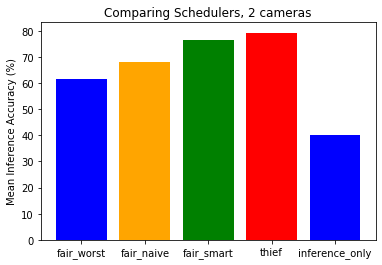

In [9]:
res = 5
plt.ylabel('Mean Inference Accuracy (%)')
plt.title('Comparing Schedulers, 2 cameras')
plt.bar(range(len(data[res])), list(data[res].values()), align='center',  color=['blue', 'orange', 'green', 'red'])
plt.xticks(range(len(data[res])), list(data[res].keys()))

{'fair_random': {'res': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'acc': [10.0, 39.41425567573421, 45.965692196599065, 59.95668720976677, 61.5635469180291, 62.63384892476943, 63.41178888160507, 63.998888454427004, 52.52484765293761, 64.8315684272963]}, 'fair_naive': {'res': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'acc': [18.7027020495676, 50.9677171934814, 66.74971629111892, 57.68569082199561, 68.2368212764251, 71.37566711639016, 60.24997018994117, 75.2906528262908, 76.61755335065692, 77.6643869037248]}, 'fair_smart': {'res': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'acc': [29.878096991432535, 61.8151546991227, 66.74971629111892, 74.14529333543567, 76.580762539028, 78.22632978839883, 79.38919278829331, 80.27125590471687, 80.97260372666382, 61.304813727483854]}, 'thief': {'res': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'acc': [41, 68.68699852524273, 74.01098217987206, 75.61582823544765, 79.22597953499384, 80.43543192436391, 81.59705150233859, 82.49098989240335, 83.07887999442768, 83.5478430438286]}, 'inference_only': 

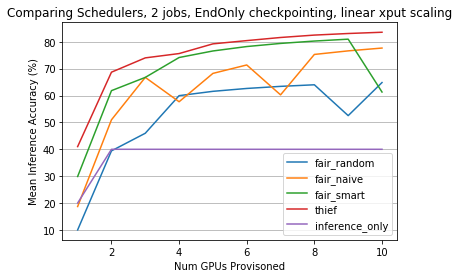

In [8]:
plt.figure()
scheduler_wise_data = {k: {"res": [], "acc": []} for k in data[1].keys()}
for res in data.keys():
    for sched in data[res].keys():
        scheduler_wise_data[sched]["res"].append(res)
        scheduler_wise_data[sched]["acc"].append(data[res][sched])
scheduler_wise_data["thief"]["acc"][0] = 41
for sched in scheduler_wise_data:
    plt.plot(scheduler_wise_data[sched]["res"], scheduler_wise_data[sched]["acc"], label=sched)
plt.xlabel('Num GPUs Provisoned')
plt.ylabel('Mean Inference Accuracy (%)')
plt.title('Comparing Schedulers, 2 jobs, EndOnly checkpointing, linear xput scaling')
plt.legend()
plt.gca().yaxis.grid(True)

print(scheduler_wise_data)

In [ ]:
data_instacp={'fair_worst': 29.690015550093747,
 'fair_smart': 50.643793494072995,
 'thief': 65.95741850672249,
 'inference_only': 15.000000000000002}

data_nocp={'fair_worst': 7.5,
 'fair_smart': 39.031395653312515,
 'thief': 51.776637679714945,
 'inference_only': 15.0}

combined_data = defaultdict(list)

combined_data = {k: [data[k], data_nocp[k]] for k in data.keys()}
print(combined_data)

In [ ]:
import numpy as np

labels = ['Always Checkpointing', 'EndOnly Checkpointing'] # [5, 30, 200], [150, 300, 200]

x = np.arange(len(labels))  # the label locations

num_bars = len(combined_data.keys())
width = 0.7/num_bars
x_pos = np.arange(-1*num_bars*width/2, num_bars*width/2, width)

fig, ax = plt.subplots()
for i, (label, values) in enumerate(combined_data.items()):
    ax.bar(x + x_pos[i], values, width, label=label, zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Inference Accuracy (%)')
ax.set_title('Comparing Schedulers vs Checkpointing Method, 2 cameras')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper center')

fig.tight_layout()
plt.grid(axis='y', zorder=0)

plt.show()

### Accuracy progression

In [ ]:
plt.figure()
for job, result in results.items():
    if job != 'meta':
        t, acc = list(zip(*result))
        plt.plot(t, acc, label=job.name)
plt.title("Training and inference job accuracy over time")
plt.legend()
plt.xlabel("Wall time")
plt.ylabel("Accuracy")

In [ ]:
for t, allocation in sim.period_allocation.items():
    names = []
    allocs = []
    for j, alloc in allocation.items():
        allocs.append(alloc)
        names.append(j.name)
    print(names, allocs)
    plt.figure()
    plt.pie(allocs, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title("Allocation at t = {}".format(t))

In [ ]:
means = []
for j, result in results.items():
    if isinstance(j, InferenceJob):
        mean_accuracy = sum(r[1] for r in result)/len(result)
        means.append(mean_accuracy)
MEAN_AUC = sum(means)/len(means)
print("Mean Inference Accuracy across all jobs: {}".format(MEAN_AUC))

In [ ]:
results['meta']